---
title: "Data Visualization with Python"
subtitle: "Matplotlib, Seaborn, and Interactive Plots"
---

## Introduction to Data Visualization

Data visualization is essential for:
- **Exploring** data patterns and relationships
- **Communicating** findings effectively
- **Debugging** data processing pipelines
- **Presenting** results to stakeholders

This tutorial covers Python's main visualization libraries with practical examples.

## Setup and Imports

In [2]:
# Core visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# Data manipulation
import pandas as pd
import numpy as np

# Display settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# High-resolution displays
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Load Sample Data

We'll use several datasets to demonstrate different visualization techniques:

In [3]:
# Load built-in datasets
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

# Create synthetic time series data
dates = pd.date_range('2023-01-01', periods=365, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(365)) + 100,
    'volume': np.random.poisson(1000, 365)
})

print(f"Penguins dataset: {penguins.shape}")
print(f"Tips dataset: {tips.shape}")
print(f"Time series: {ts_data.shape}")
penguins.head()

Penguins dataset: (344, 7)
Tips dataset: (244, 7)
Time series: (365, 3)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

## Part 1: Matplotlib Fundamentals

Matplotlib is the foundation of Python visualization. Most other libraries build on top of it.

### Basic Plot Types

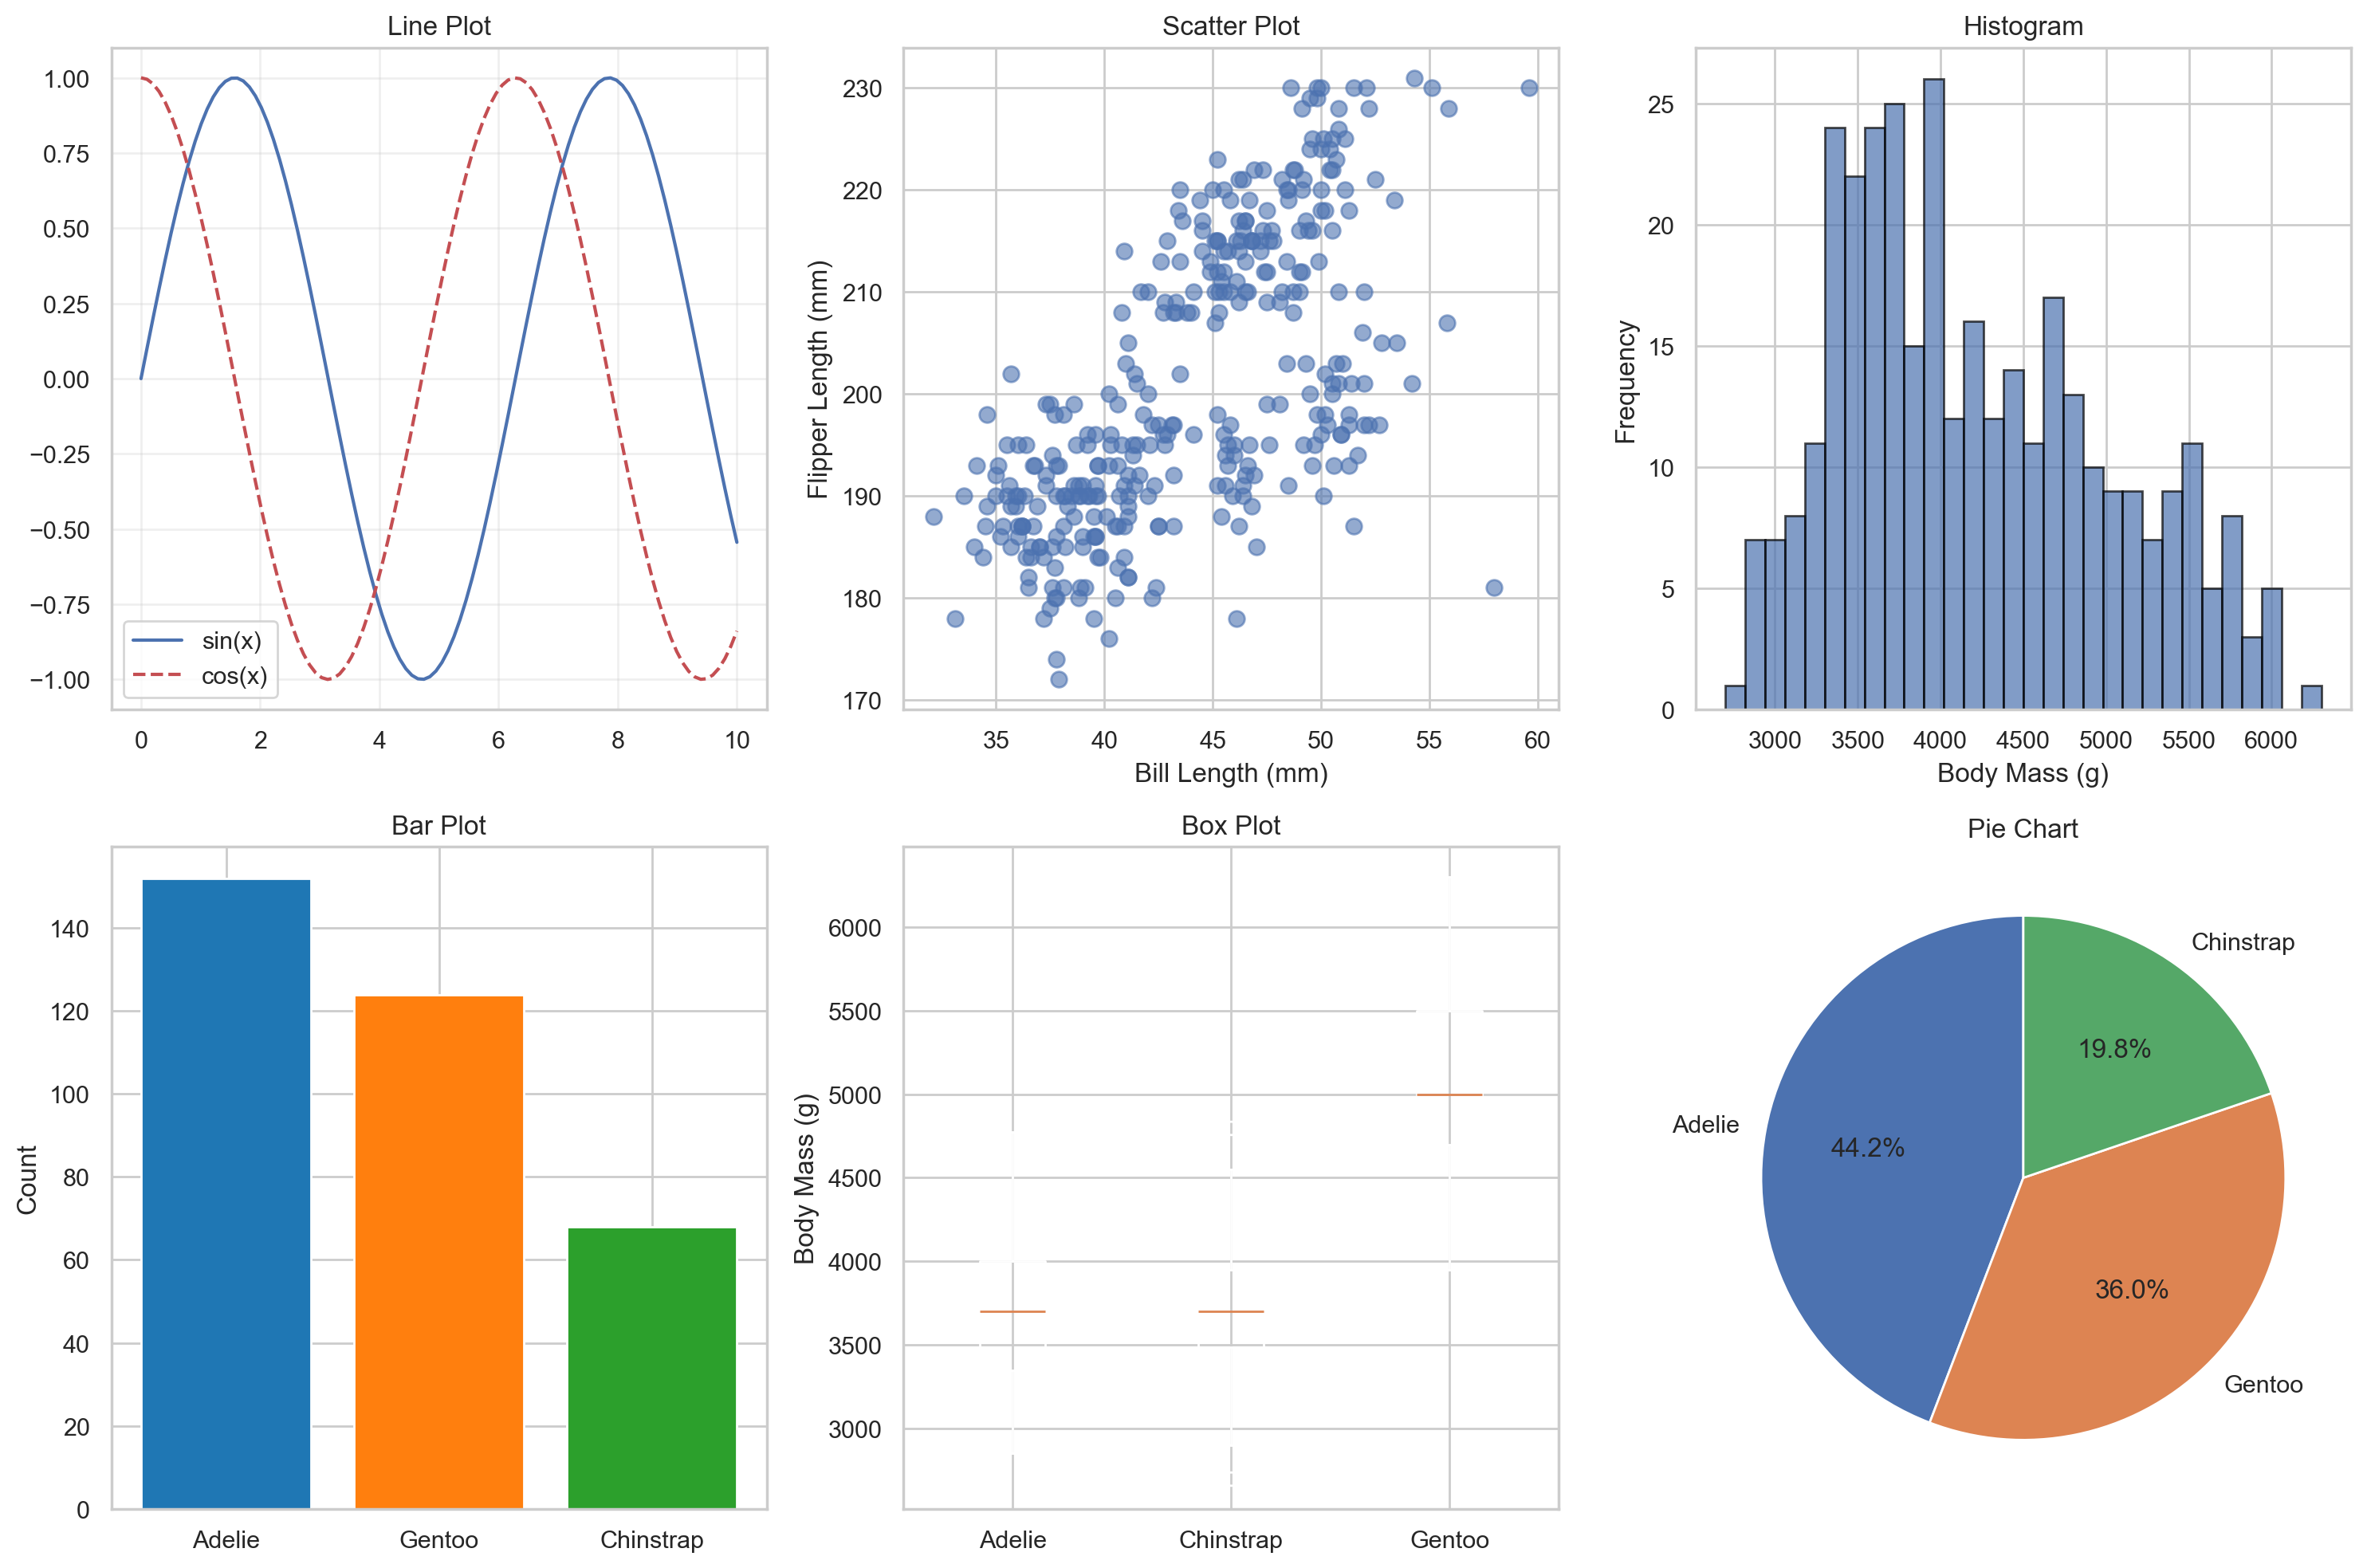

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Line plot
x = np.linspace(0, 10, 100)
axes[0, 0].plot(x, np.sin(x), 'b-', label='sin(x)')
axes[0, 0].plot(x, np.cos(x), 'r--', label='cos(x)')
axes[0, 0].set_title('Line Plot')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Scatter plot
axes[0, 1].scatter(penguins['bill_length_mm'], 
                   penguins['flipper_length_mm'],
                   alpha=0.6, s=50)
axes[0, 1].set_title('Scatter Plot')
axes[0, 1].set_xlabel('Bill Length (mm)')
axes[0, 1].set_ylabel('Flipper Length (mm)')

# 3. Histogram
axes[0, 2].hist(penguins['body_mass_g'].dropna(), 
                bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Histogram')
axes[0, 2].set_xlabel('Body Mass (g)')
axes[0, 2].set_ylabel('Frequency')

# 4. Bar plot
species_counts = penguins['species'].value_counts()
axes[1, 0].bar(species_counts.index, species_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_title('Bar Plot')
axes[1, 0].set_ylabel('Count')

# 5. Box plot
data_to_plot = [penguins[penguins['species'] == s]['body_mass_g'].dropna() 
                for s in penguins['species'].unique()]
axes[1, 1].boxplot(data_to_plot, labels=penguins['species'].unique())
axes[1, 1].set_title('Box Plot')
axes[1, 1].set_ylabel('Body Mass (g)')

# 6. Pie chart
axes[1, 2].pie(species_counts.values, labels=species_counts.index, 
               autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('Pie Chart')

plt.tight_layout()
plt.show()

### Customizing Plots

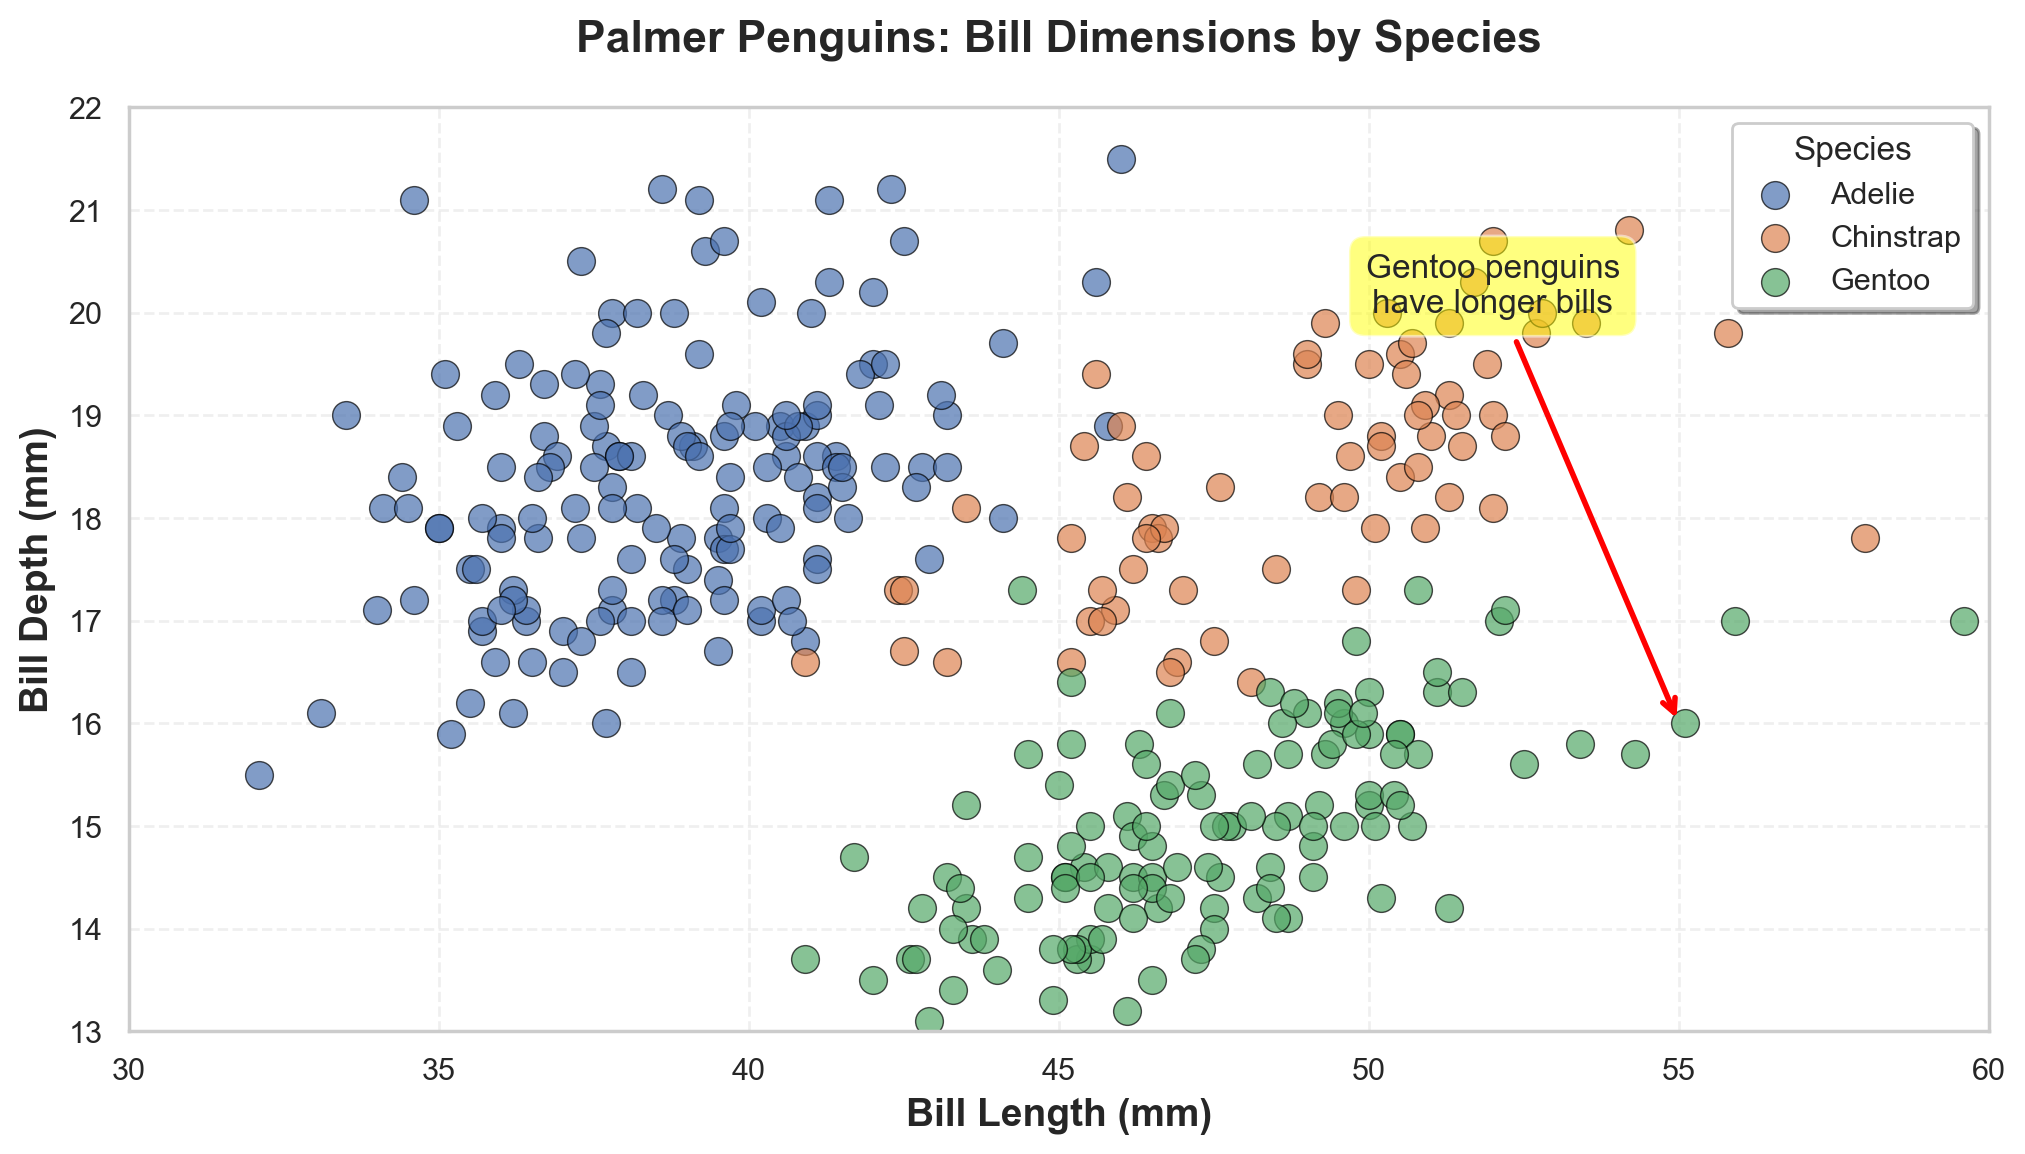

In [5]:
# Create a customized plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data with custom styling
for species in penguins['species'].unique():
    data = penguins[penguins['species'] == species]
    ax.scatter(data['bill_length_mm'], 
               data['bill_depth_mm'],
               label=species,
               s=100,
               alpha=0.7,
               edgecolor='black',
               linewidth=0.5)

# Customize appearance
ax.set_xlabel('Bill Length (mm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Bill Depth (mm)', fontsize=14, fontweight='bold')
ax.set_title('Palmer Penguins: Bill Dimensions by Species', 
             fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Customize legend
ax.legend(title='Species', loc='upper right', 
          frameon=True, fancybox=True, shadow=True)

# Add text annotation
ax.annotate('Gentoo penguins\nhave longer bills', 
            xy=(55, 16), xytext=(52, 20),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5))

# Set axis limits
ax.set_xlim(30, 60)
ax.set_ylim(13, 22)

plt.show()

## Part 2: Seaborn - Statistical Visualization

Seaborn provides high-level interface for statistical graphics.

### Distribution Plots

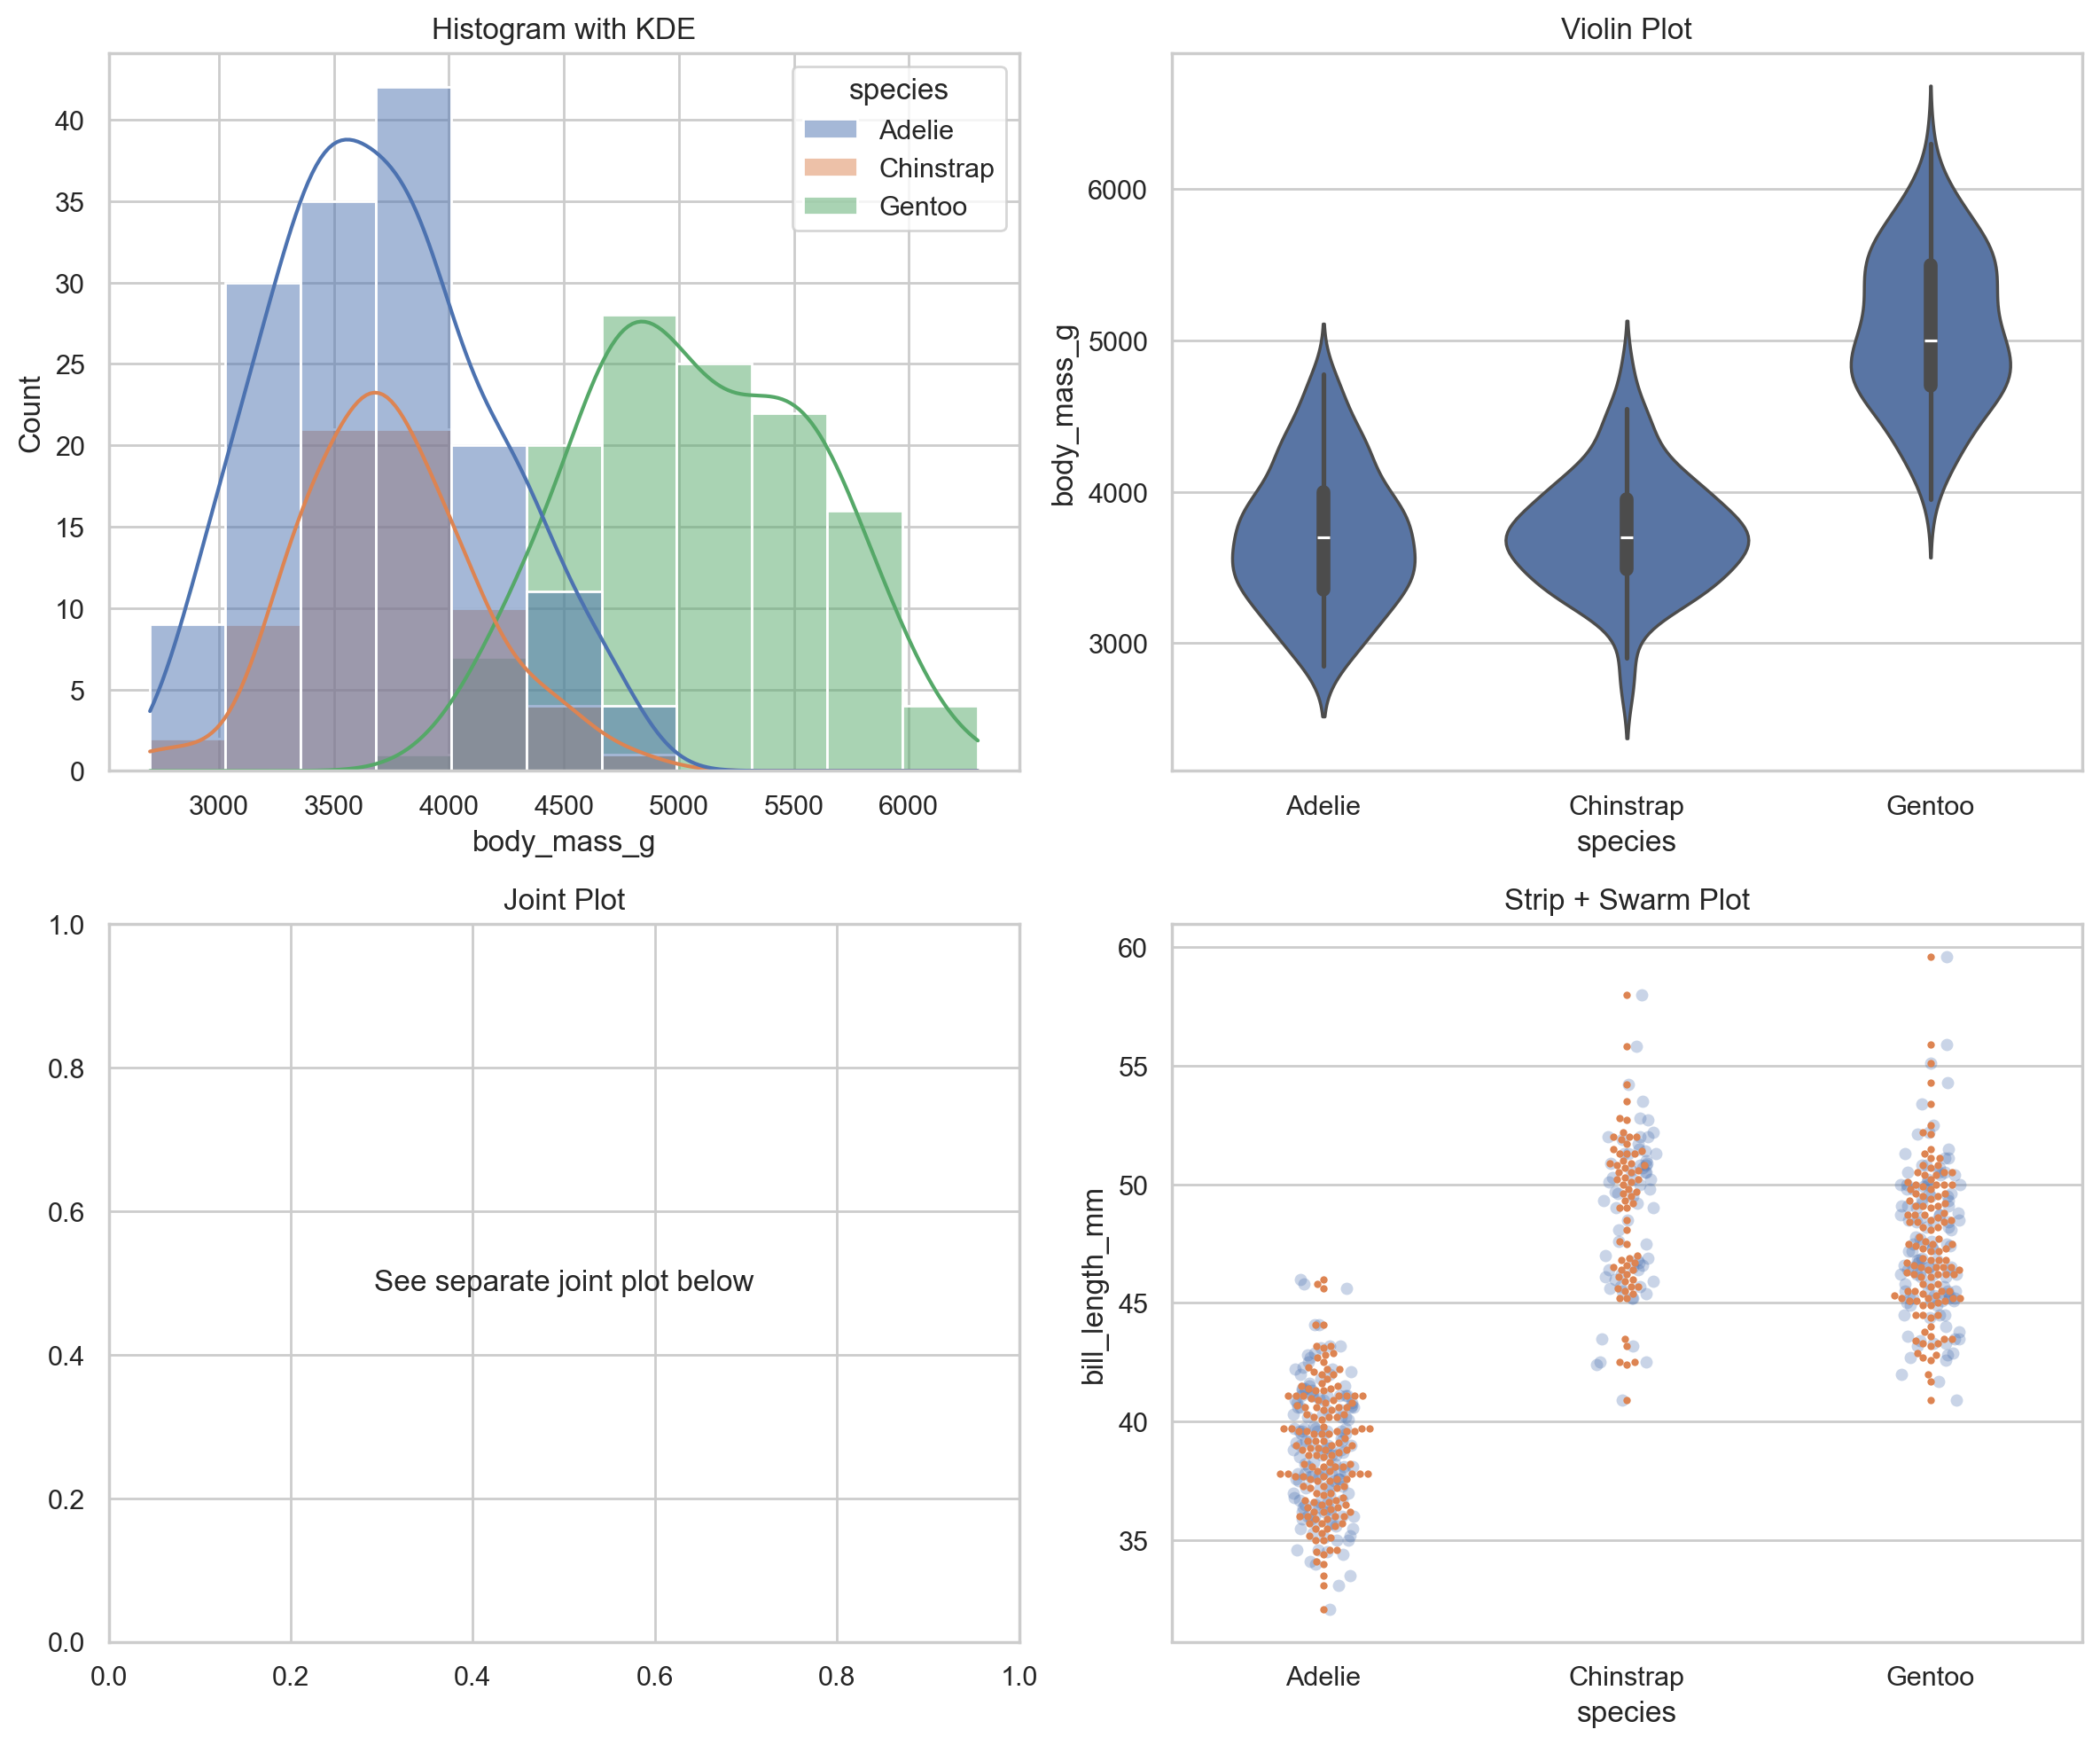

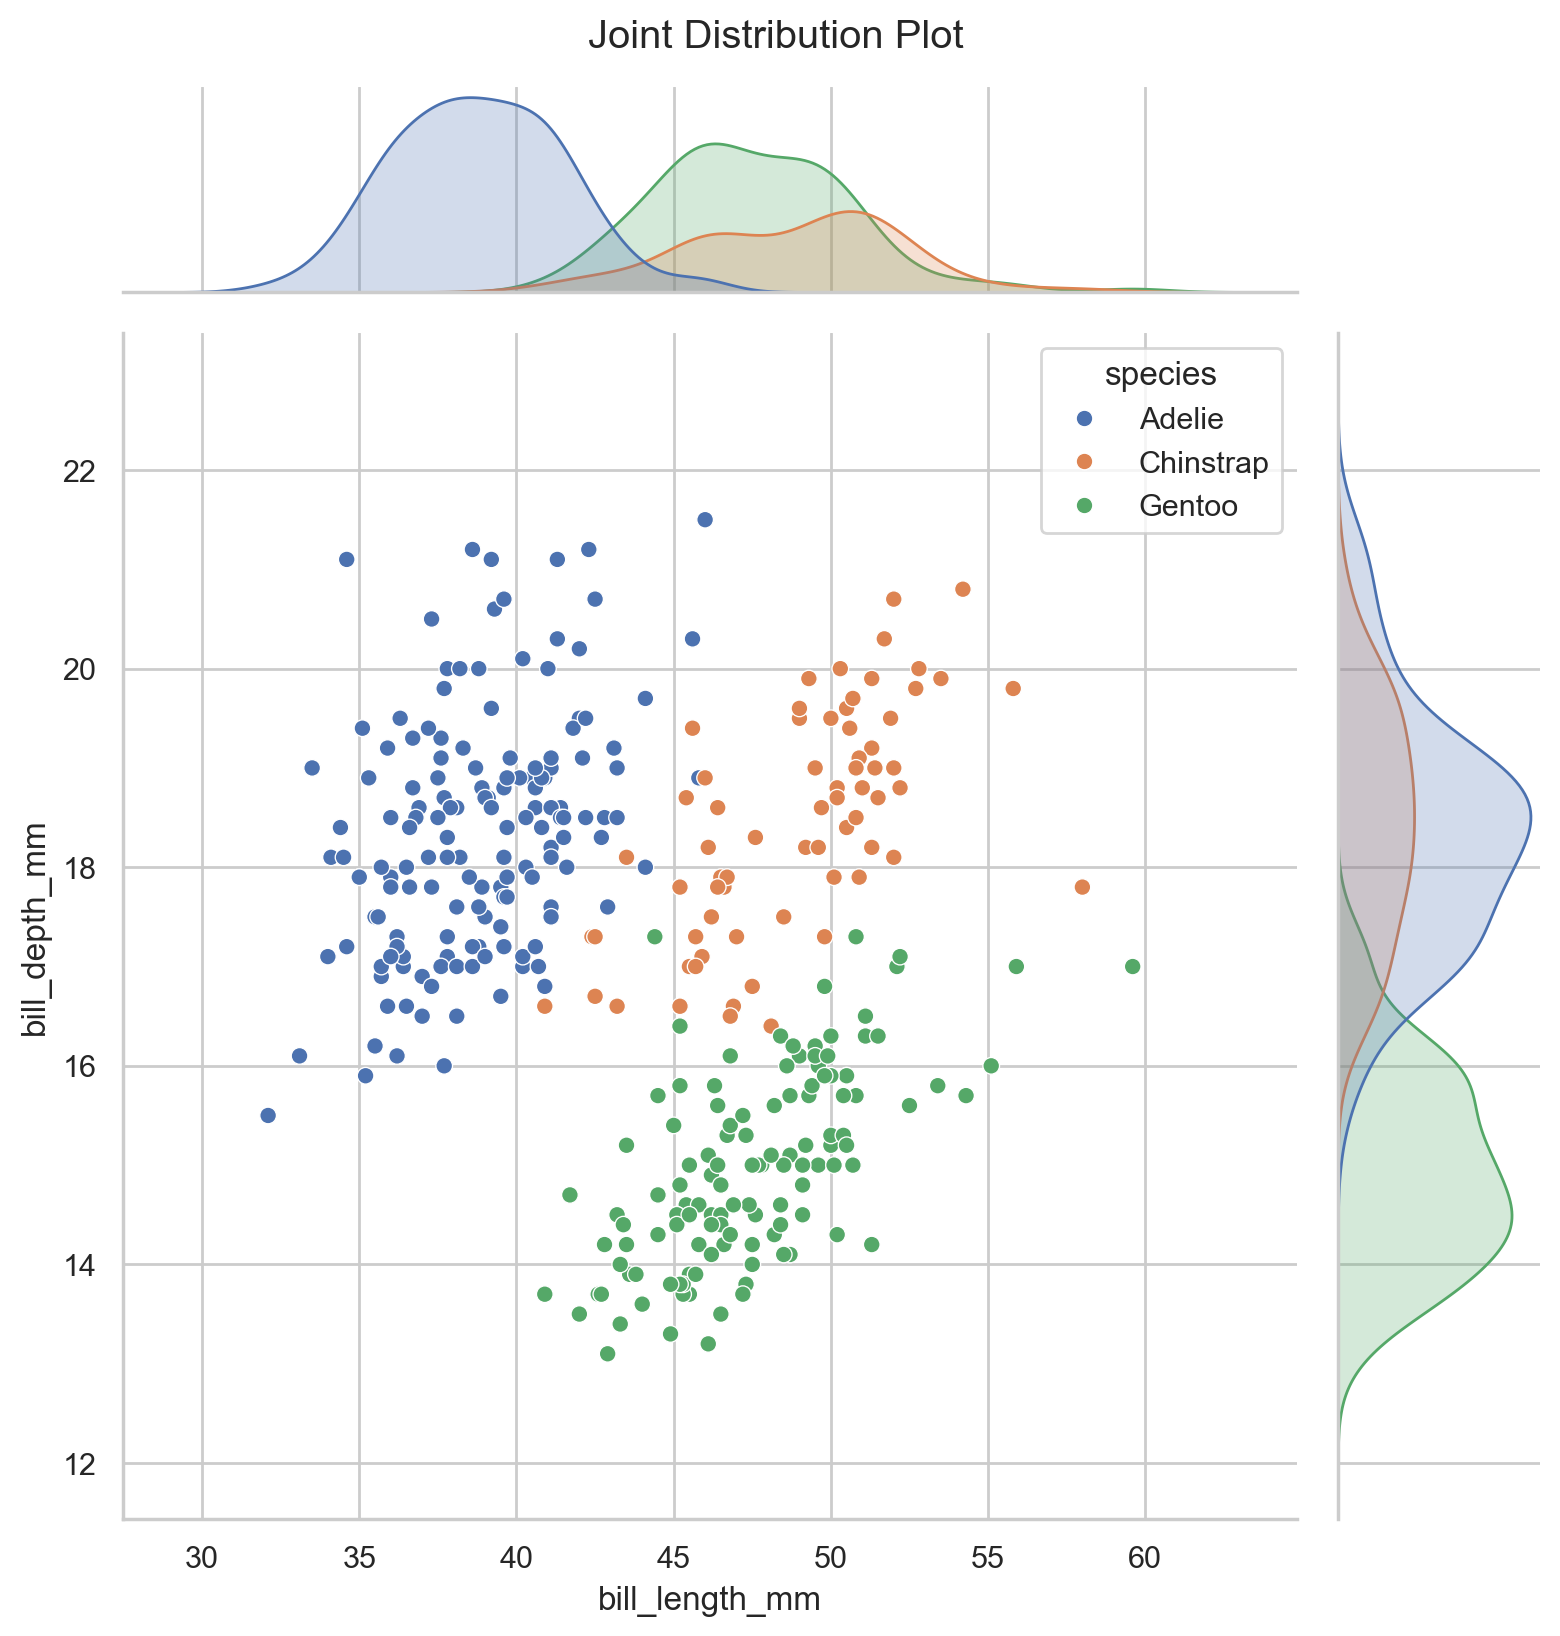

In [6]:
# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram with KDE
sns.histplot(data=penguins, x='body_mass_g', hue='species', 
             kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram with KDE')

# 2. Violin plot
sns.violinplot(data=penguins, x='species', y='body_mass_g', 
               ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot')

# 3. Joint plot (requires separate figure)
axes[1, 0].text(0.5, 0.5, 'See separate joint plot below', 
                ha='center', va='center', fontsize=12)
axes[1, 0].set_title('Joint Plot')

# 4. Strip plot with swarm
sns.stripplot(data=penguins, x='species', y='bill_length_mm', 
              alpha=0.3, ax=axes[1, 1])
sns.swarmplot(data=penguins, x='species', y='bill_length_mm', 
              size=3, ax=axes[1, 1])
axes[1, 1].set_title('Strip + Swarm Plot')

plt.tight_layout()
plt.show()

# Create joint plot separately
g = sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', 
                  hue='species', kind='scatter', height=8)
g.fig.suptitle('Joint Distribution Plot', y=1.02)
plt.show()

### Categorical Plots

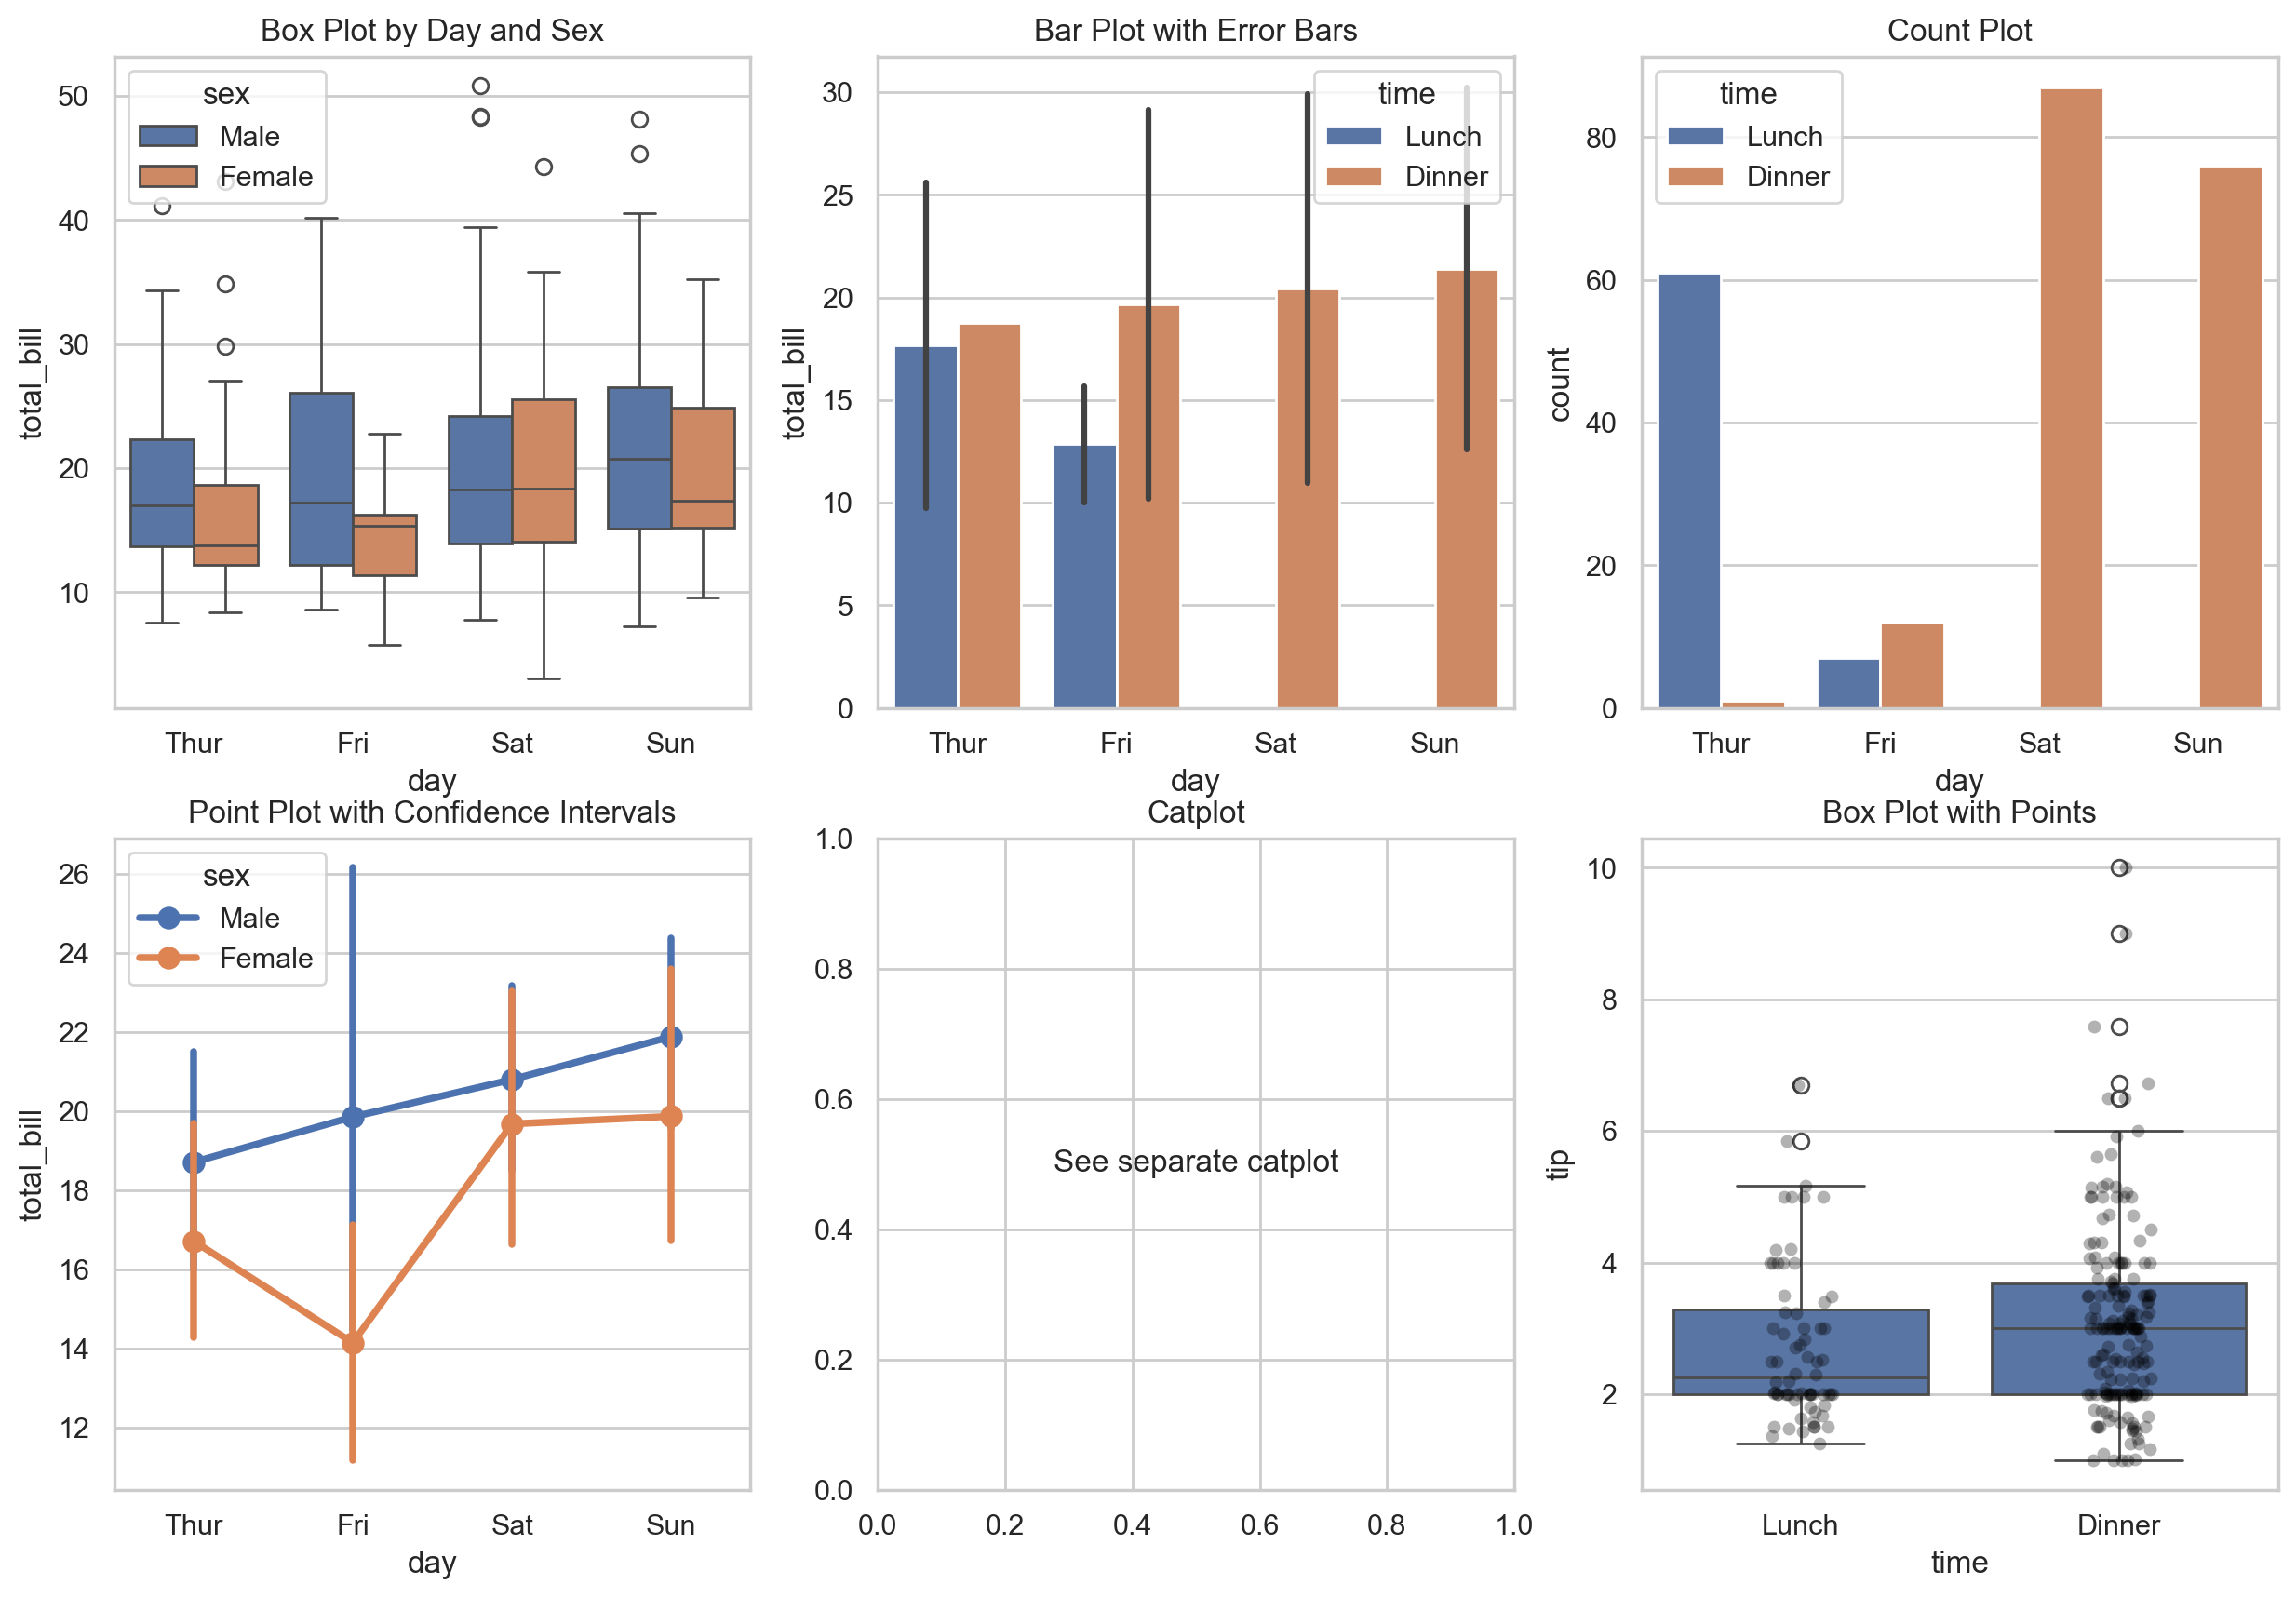

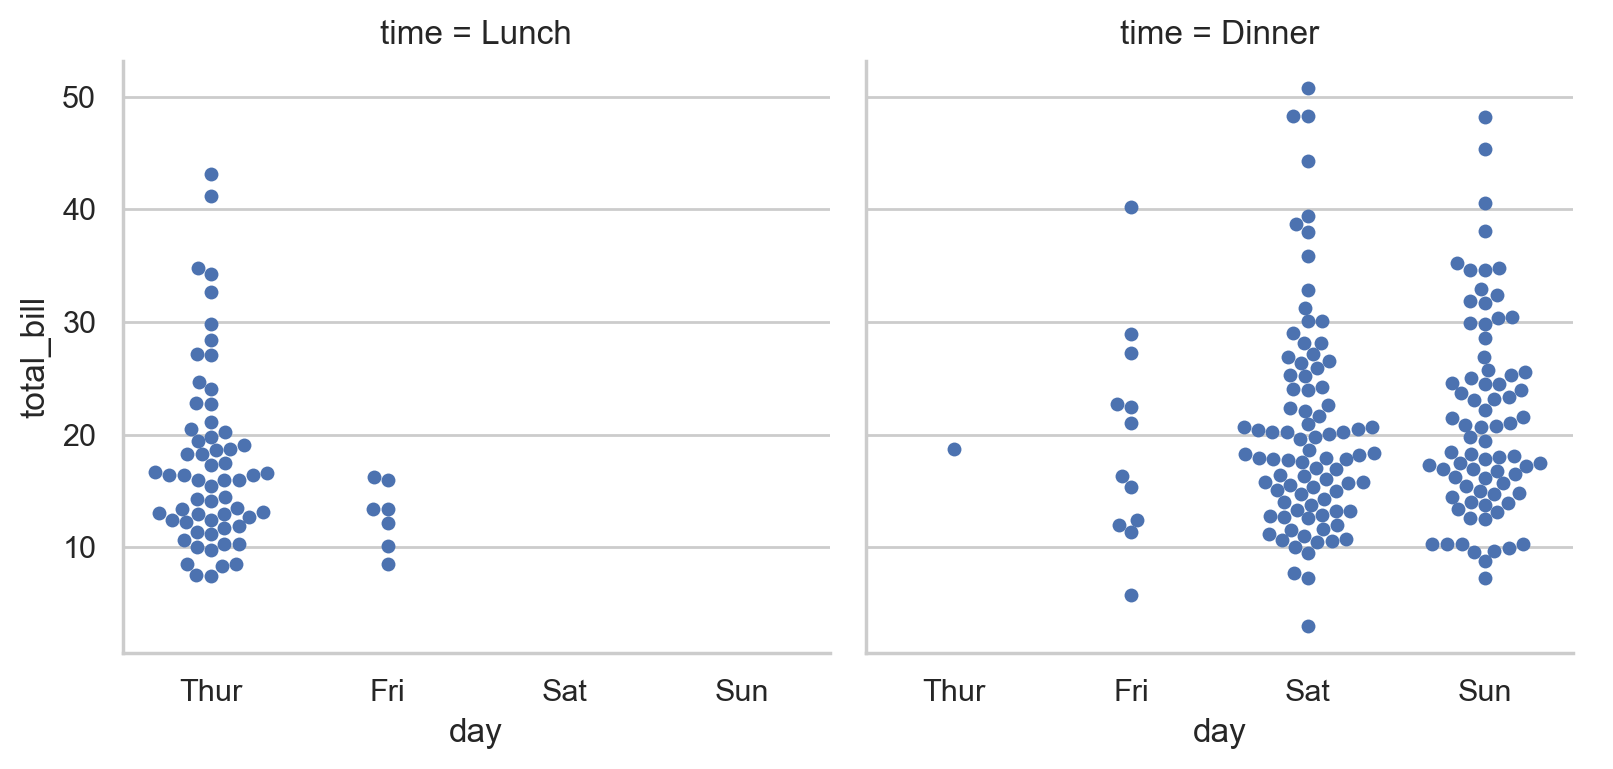

In [7]:
# Categorical plot examples
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Box plot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot by Day and Sex')

# 2. Bar plot with error bars
sns.barplot(data=tips, x='day', y='total_bill', hue='time', 
            errorbar='sd', ax=axes[0, 1])
axes[0, 1].set_title('Bar Plot with Error Bars')

# 3. Count plot
sns.countplot(data=tips, x='day', hue='time', ax=axes[0, 2])
axes[0, 2].set_title('Count Plot')

# 4. Point plot
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex', 
              ax=axes[1, 0])
axes[1, 0].set_title('Point Plot with Confidence Intervals')

# 5. Categorical scatter
sns.catplot(data=tips, x='day', y='total_bill', 
            col='time', kind='swarm', height=4)
axes[1, 1].text(0.5, 0.5, 'See separate catplot', 
                ha='center', va='center')
axes[1, 1].set_title('Catplot')

# 6. Box-and-whisker with points
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1, 2])
sns.stripplot(data=tips, x='time', y='tip', 
              color='black', alpha=0.3, ax=axes[1, 2])
axes[1, 2].set_title('Box Plot with Points')

plt.tight_layout()
plt.show()

### Regression and Relationships

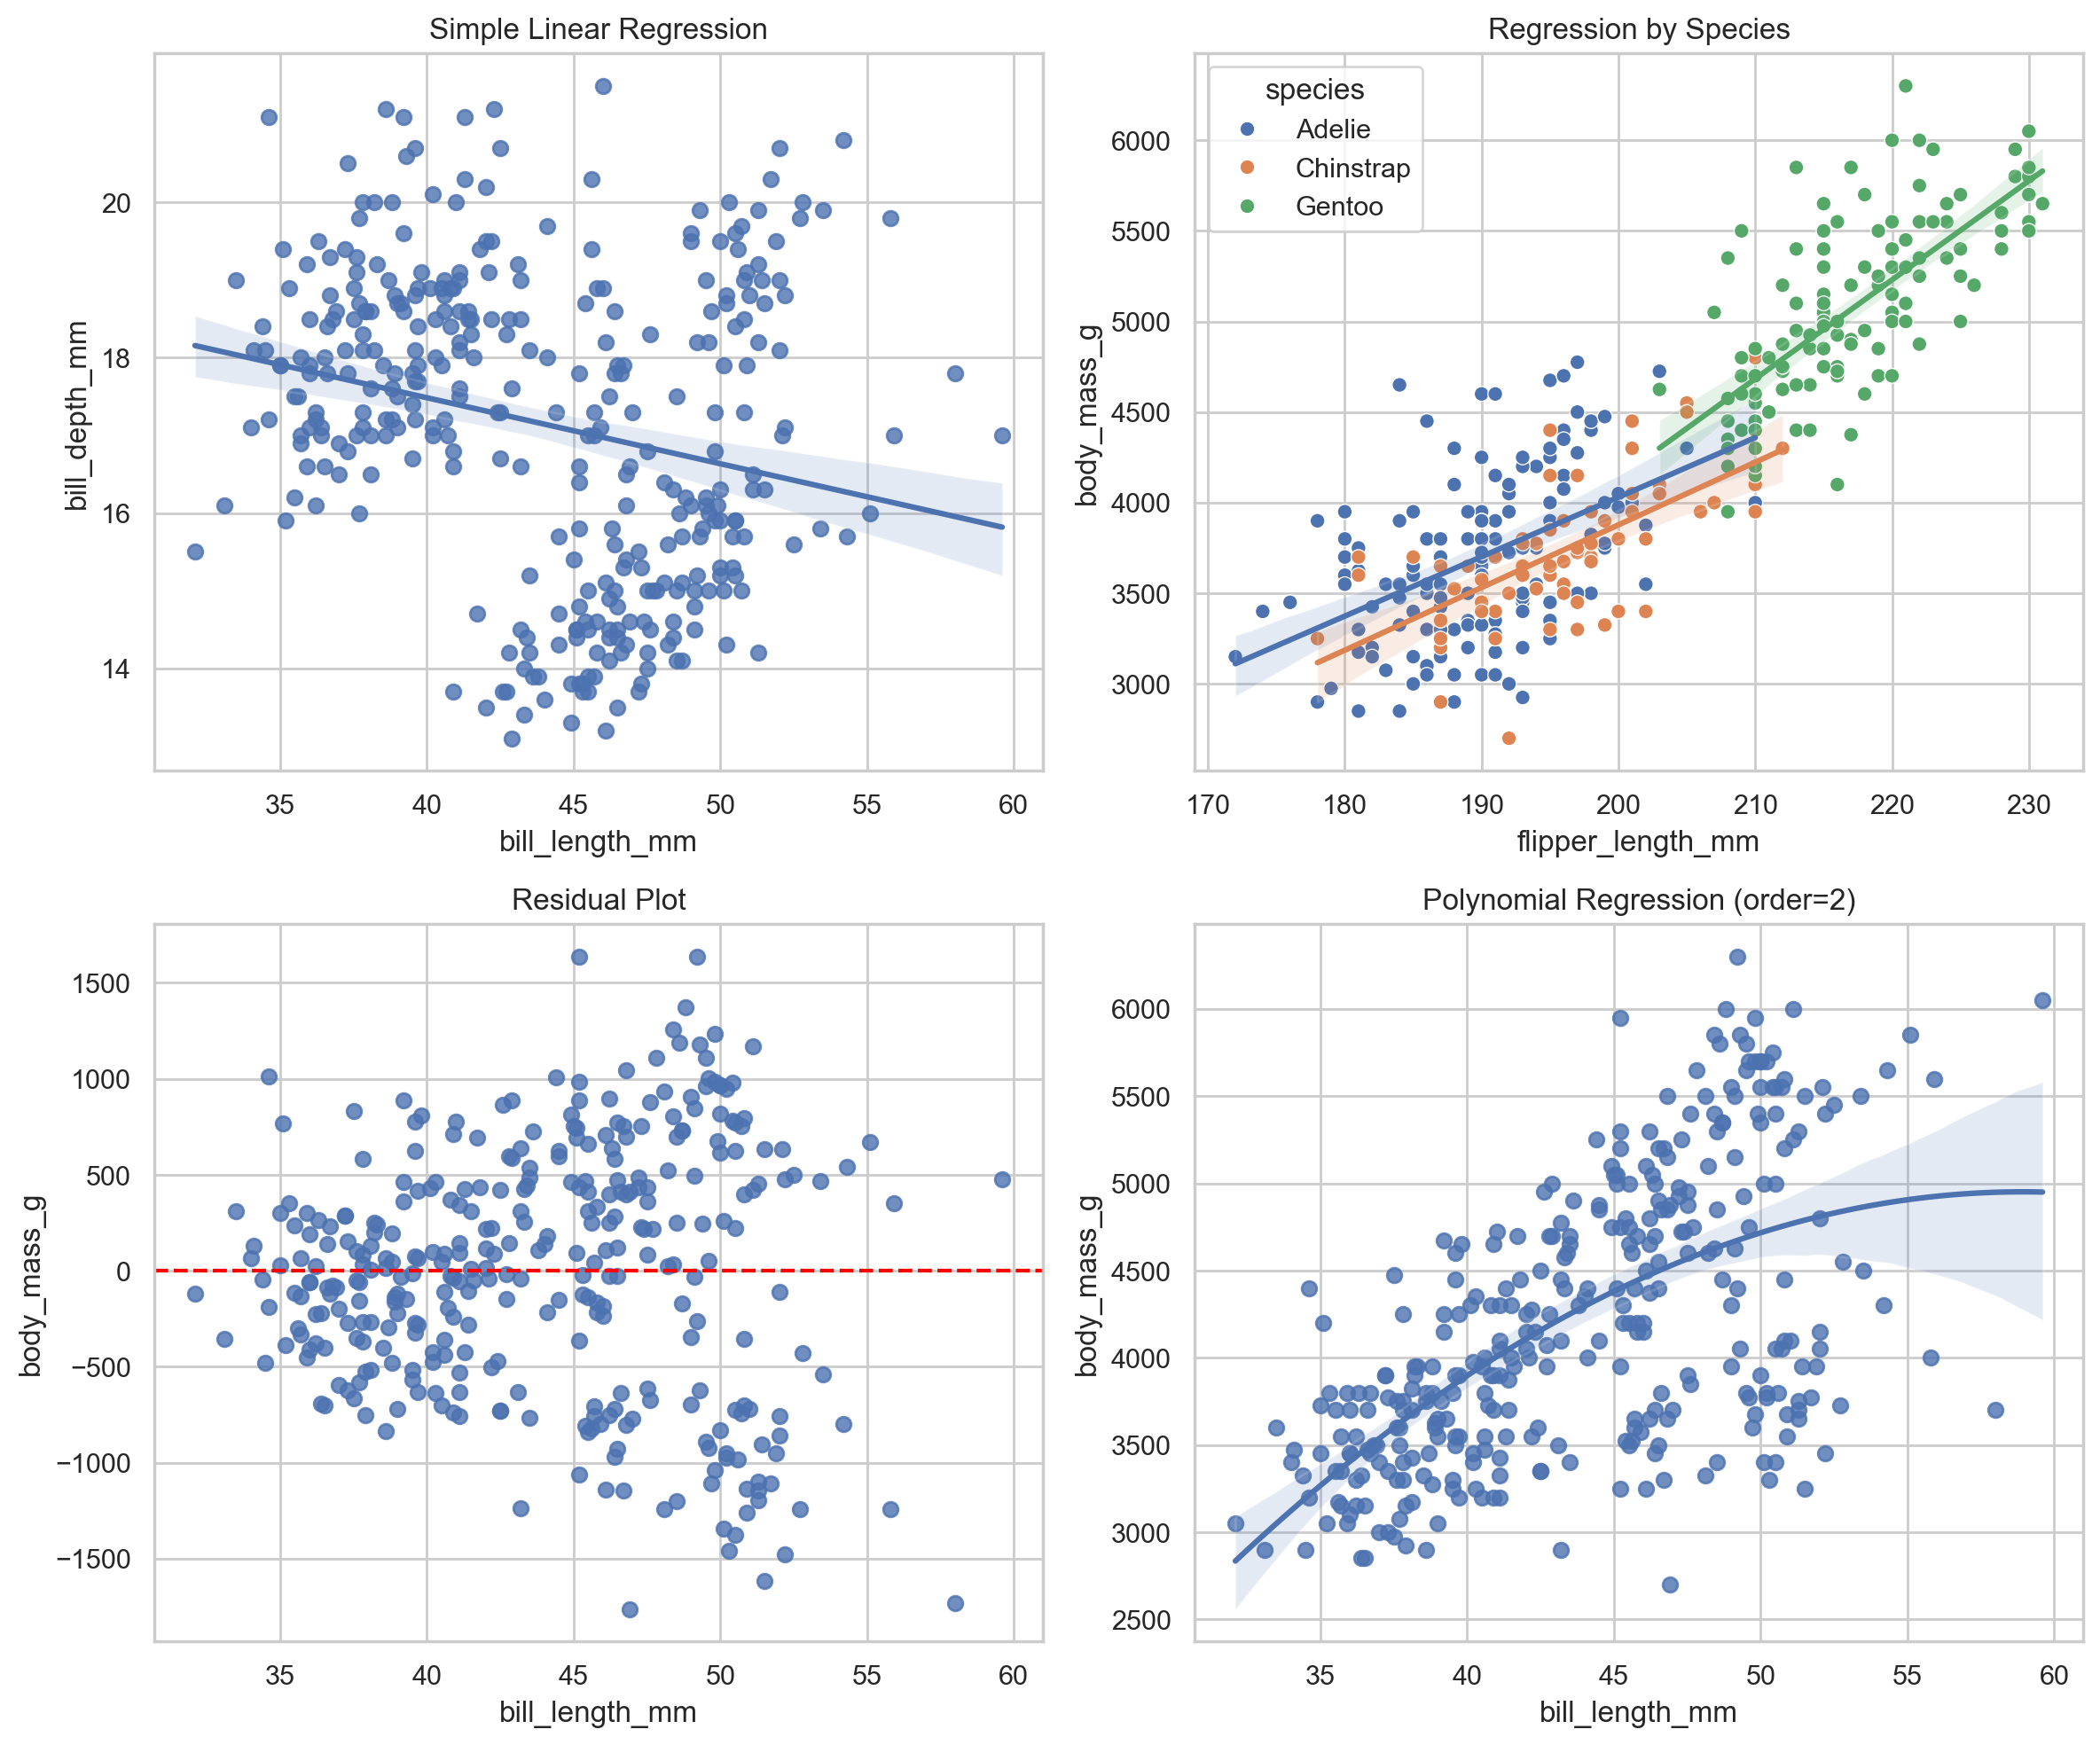

In [8]:
# Regression plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Simple regression
sns.regplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', 
            ax=axes[0, 0])
axes[0, 0].set_title('Simple Linear Regression')

# 2. Regression by groups
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', 
                hue='species', ax=axes[0, 1])
for species in penguins['species'].unique():
    data = penguins[penguins['species'] == species]
    sns.regplot(data=data, x='flipper_length_mm', y='body_mass_g', 
                scatter=False, ax=axes[0, 1])
axes[0, 1].set_title('Regression by Species')

# 3. Residual plot
sns.residplot(data=penguins, x='bill_length_mm', y='body_mass_g', 
              ax=axes[1, 0])
axes[1, 0].set_title('Residual Plot')
axes[1, 0].axhline(y=0, color='red', linestyle='--')

# 4. Polynomial regression
sns.regplot(data=penguins, x='bill_length_mm', y='body_mass_g', 
            order=2, ax=axes[1, 1])
axes[1, 1].set_title('Polynomial Regression (order=2)')

plt.tight_layout()
plt.show()

### Heatmaps and Correlation

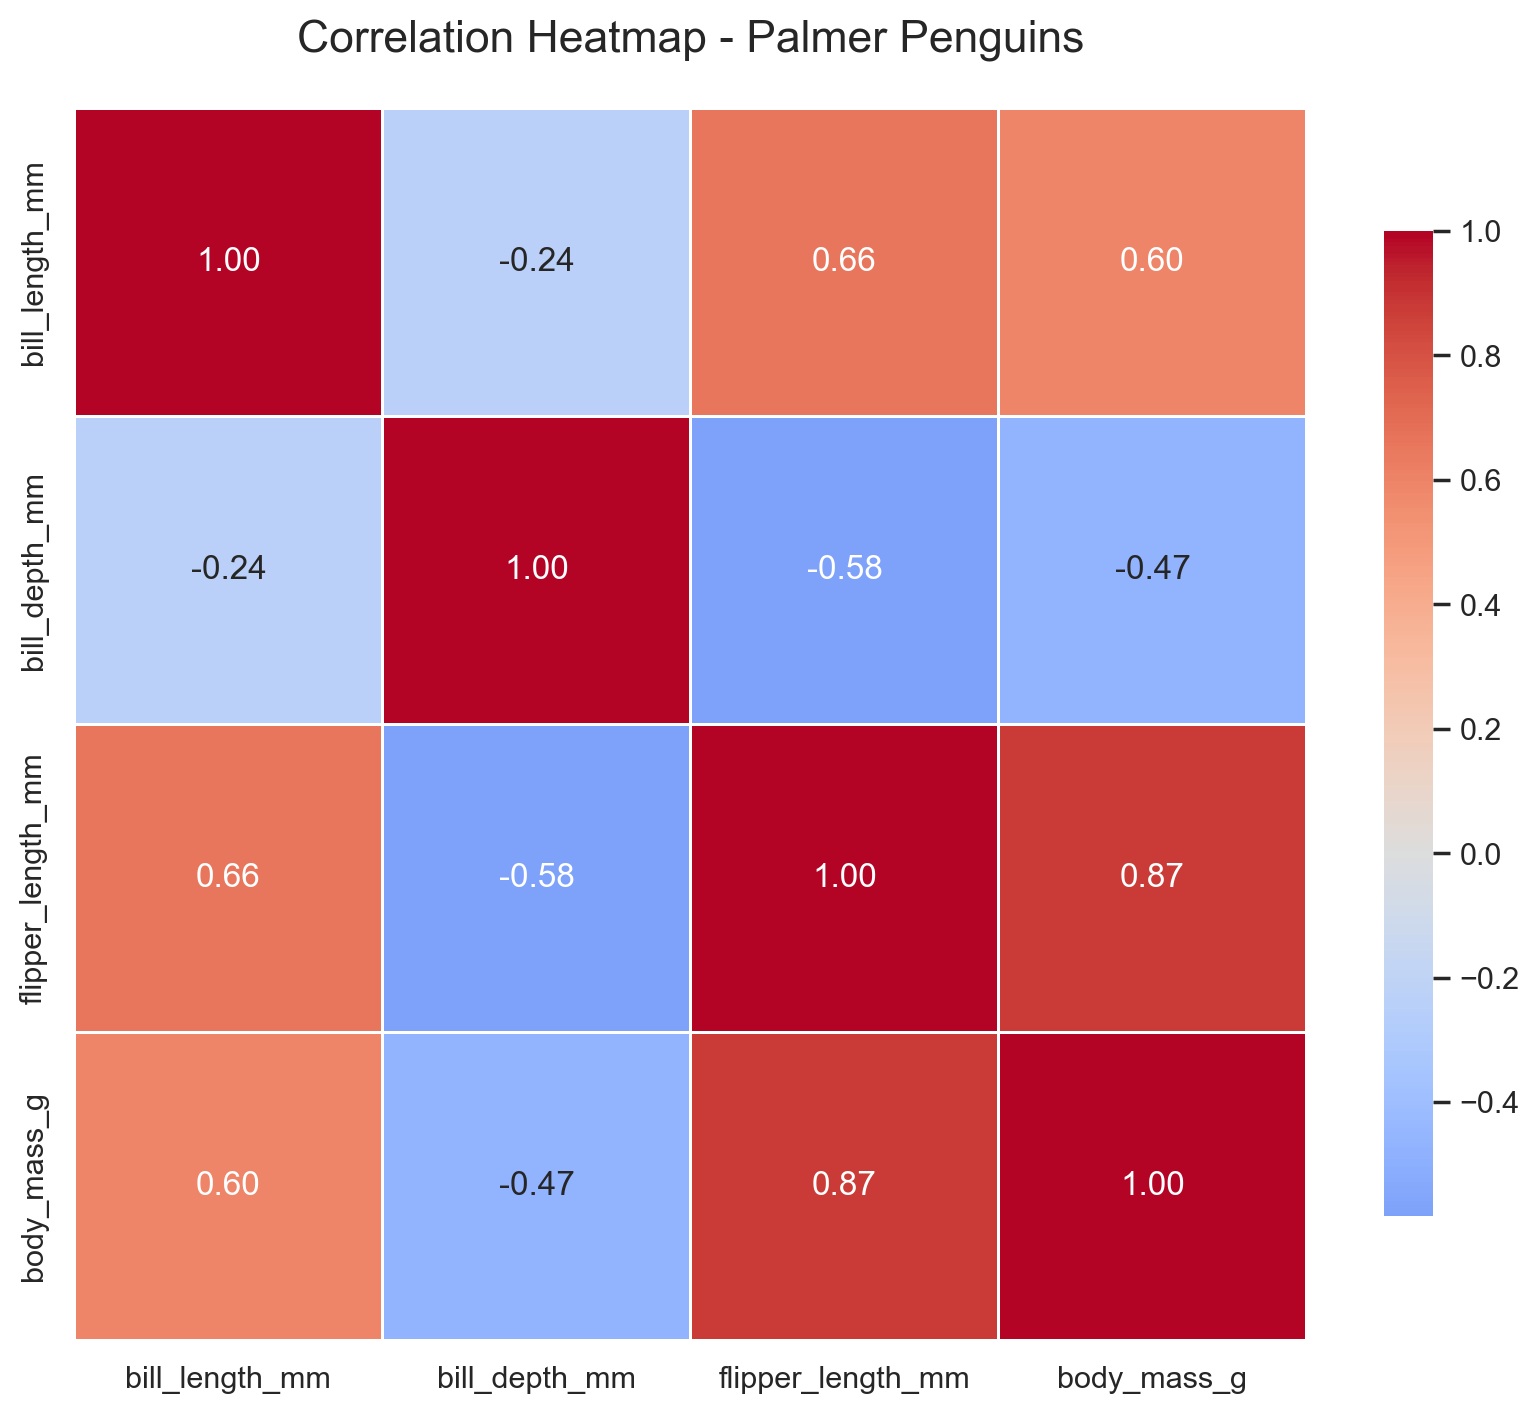

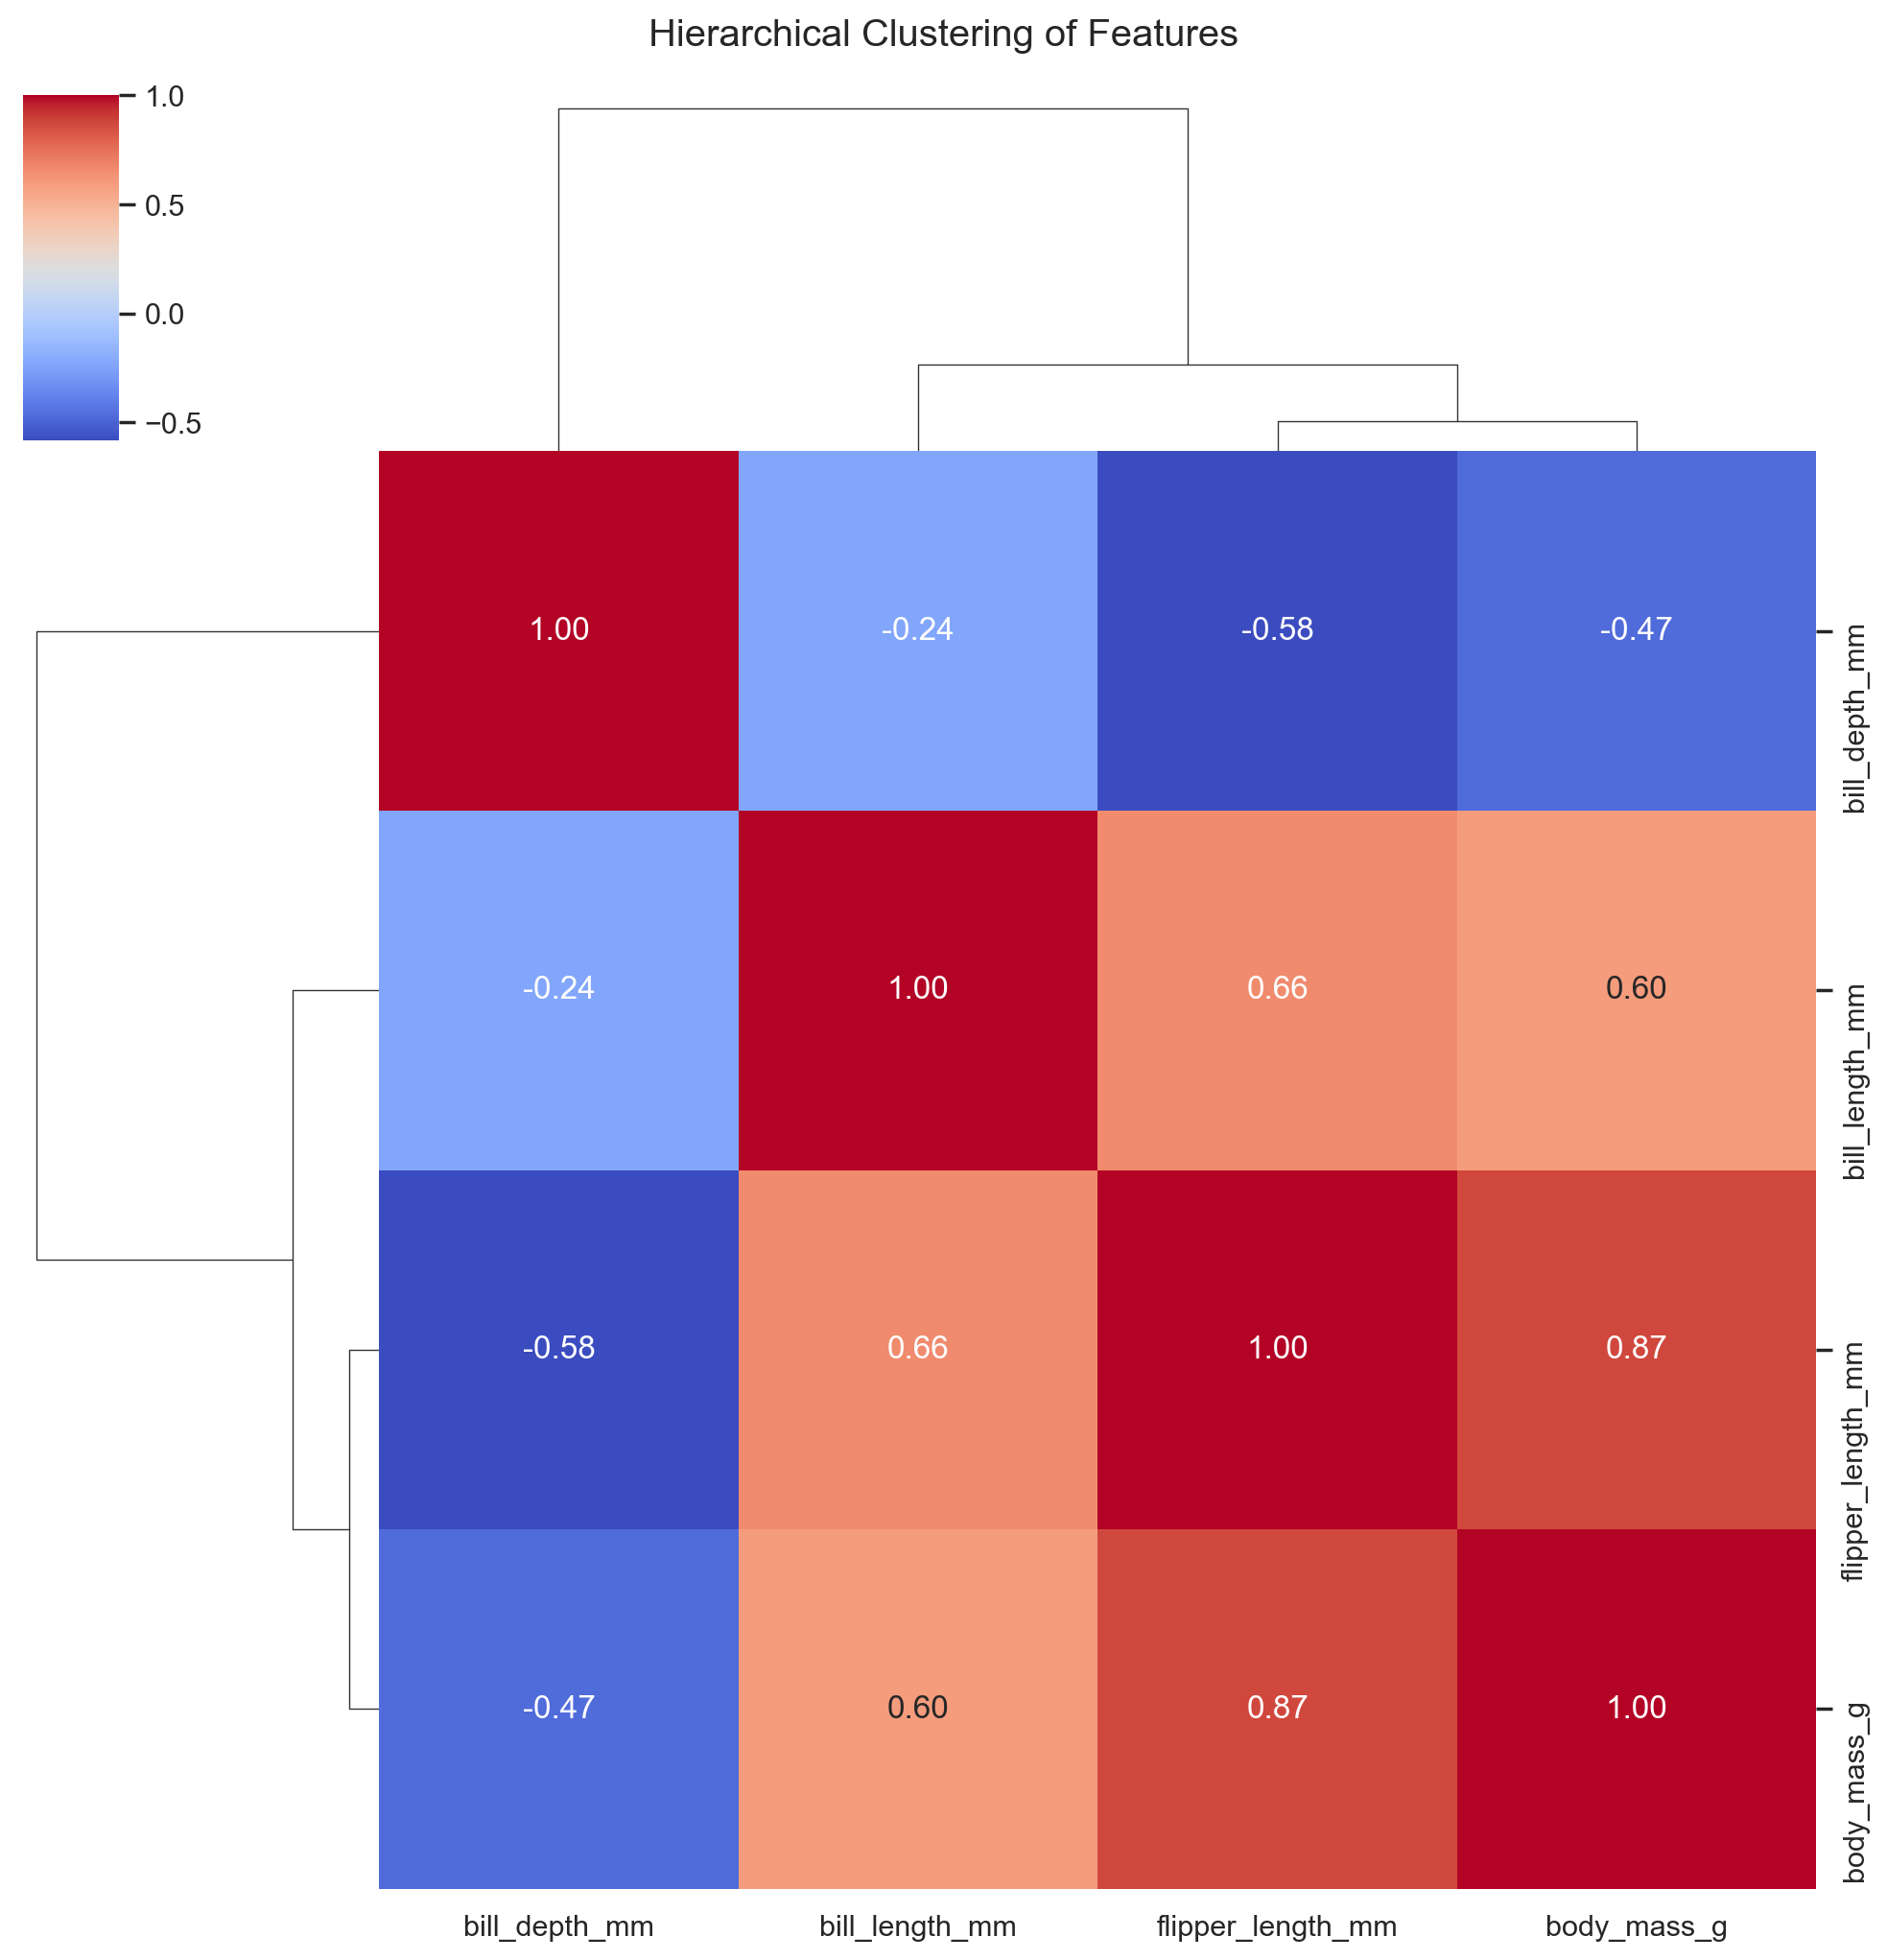

In [9]:
# Correlation analysis
numeric_cols = penguins.select_dtypes(include=[np.number]).columns
correlation_matrix = penguins[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True, # Square cells
            linewidths=1,  # Grid lines
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap - Palmer Penguins', fontsize=16, pad=20)
plt.show()

# Clustermap for hierarchical clustering
g = sns.clustermap(correlation_matrix, 
                   cmap='coolwarm', 
                   annot=True, 
                   fmt='.2f',
                   figsize=(10, 10))
g.fig.suptitle('Hierarchical Clustering of Features', y=1.02)
plt.show()

## Part 3: Multi-Panel Figures

Creating complex layouts and faceted plots.

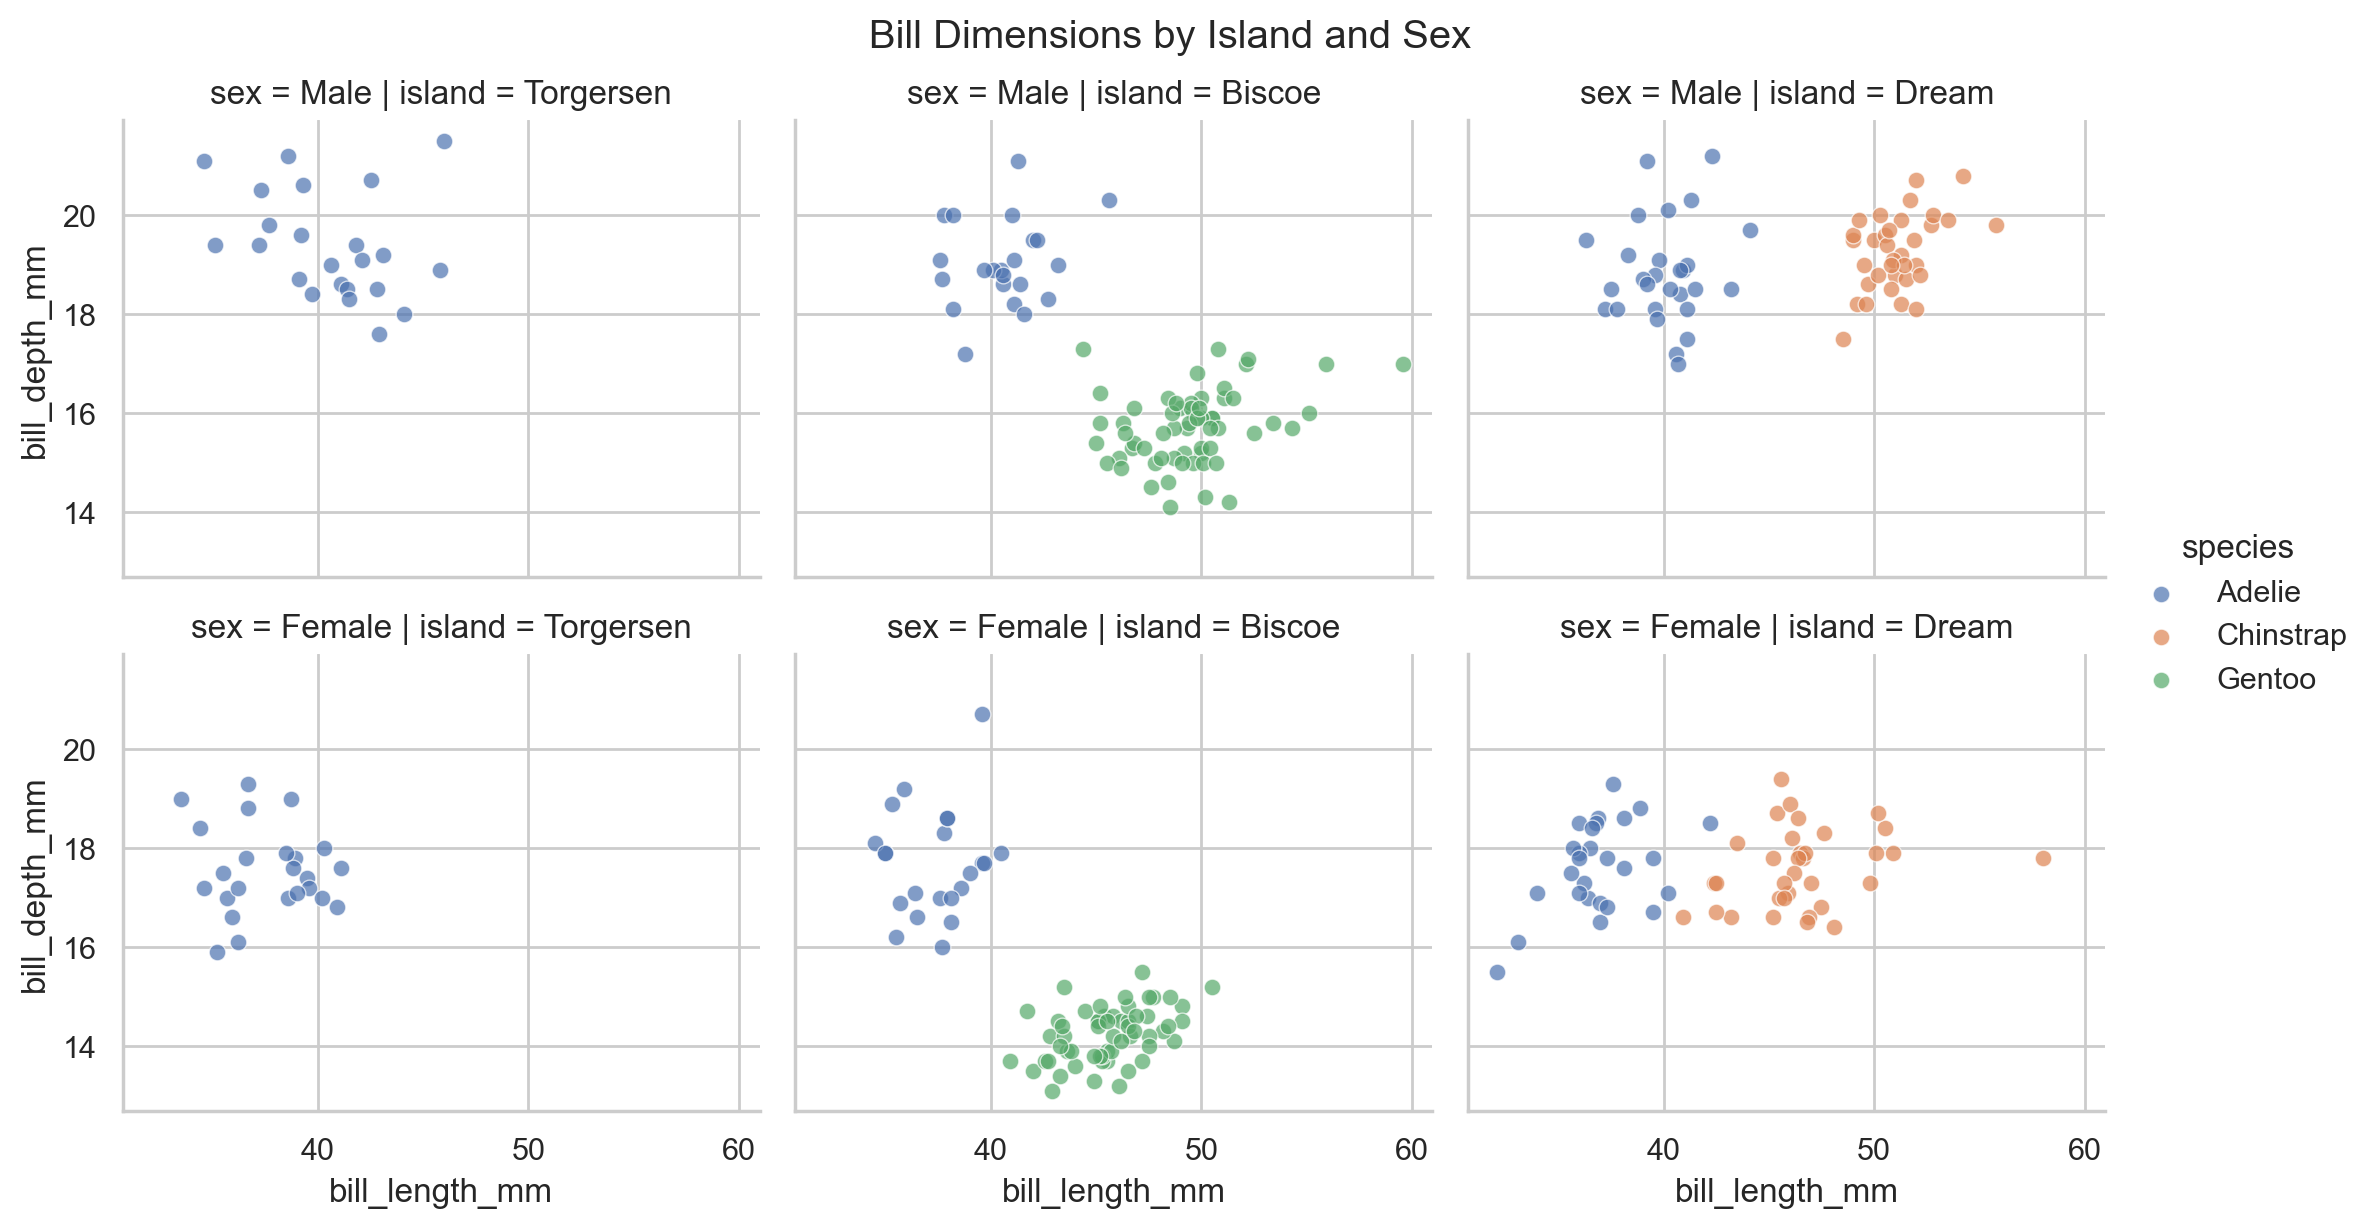

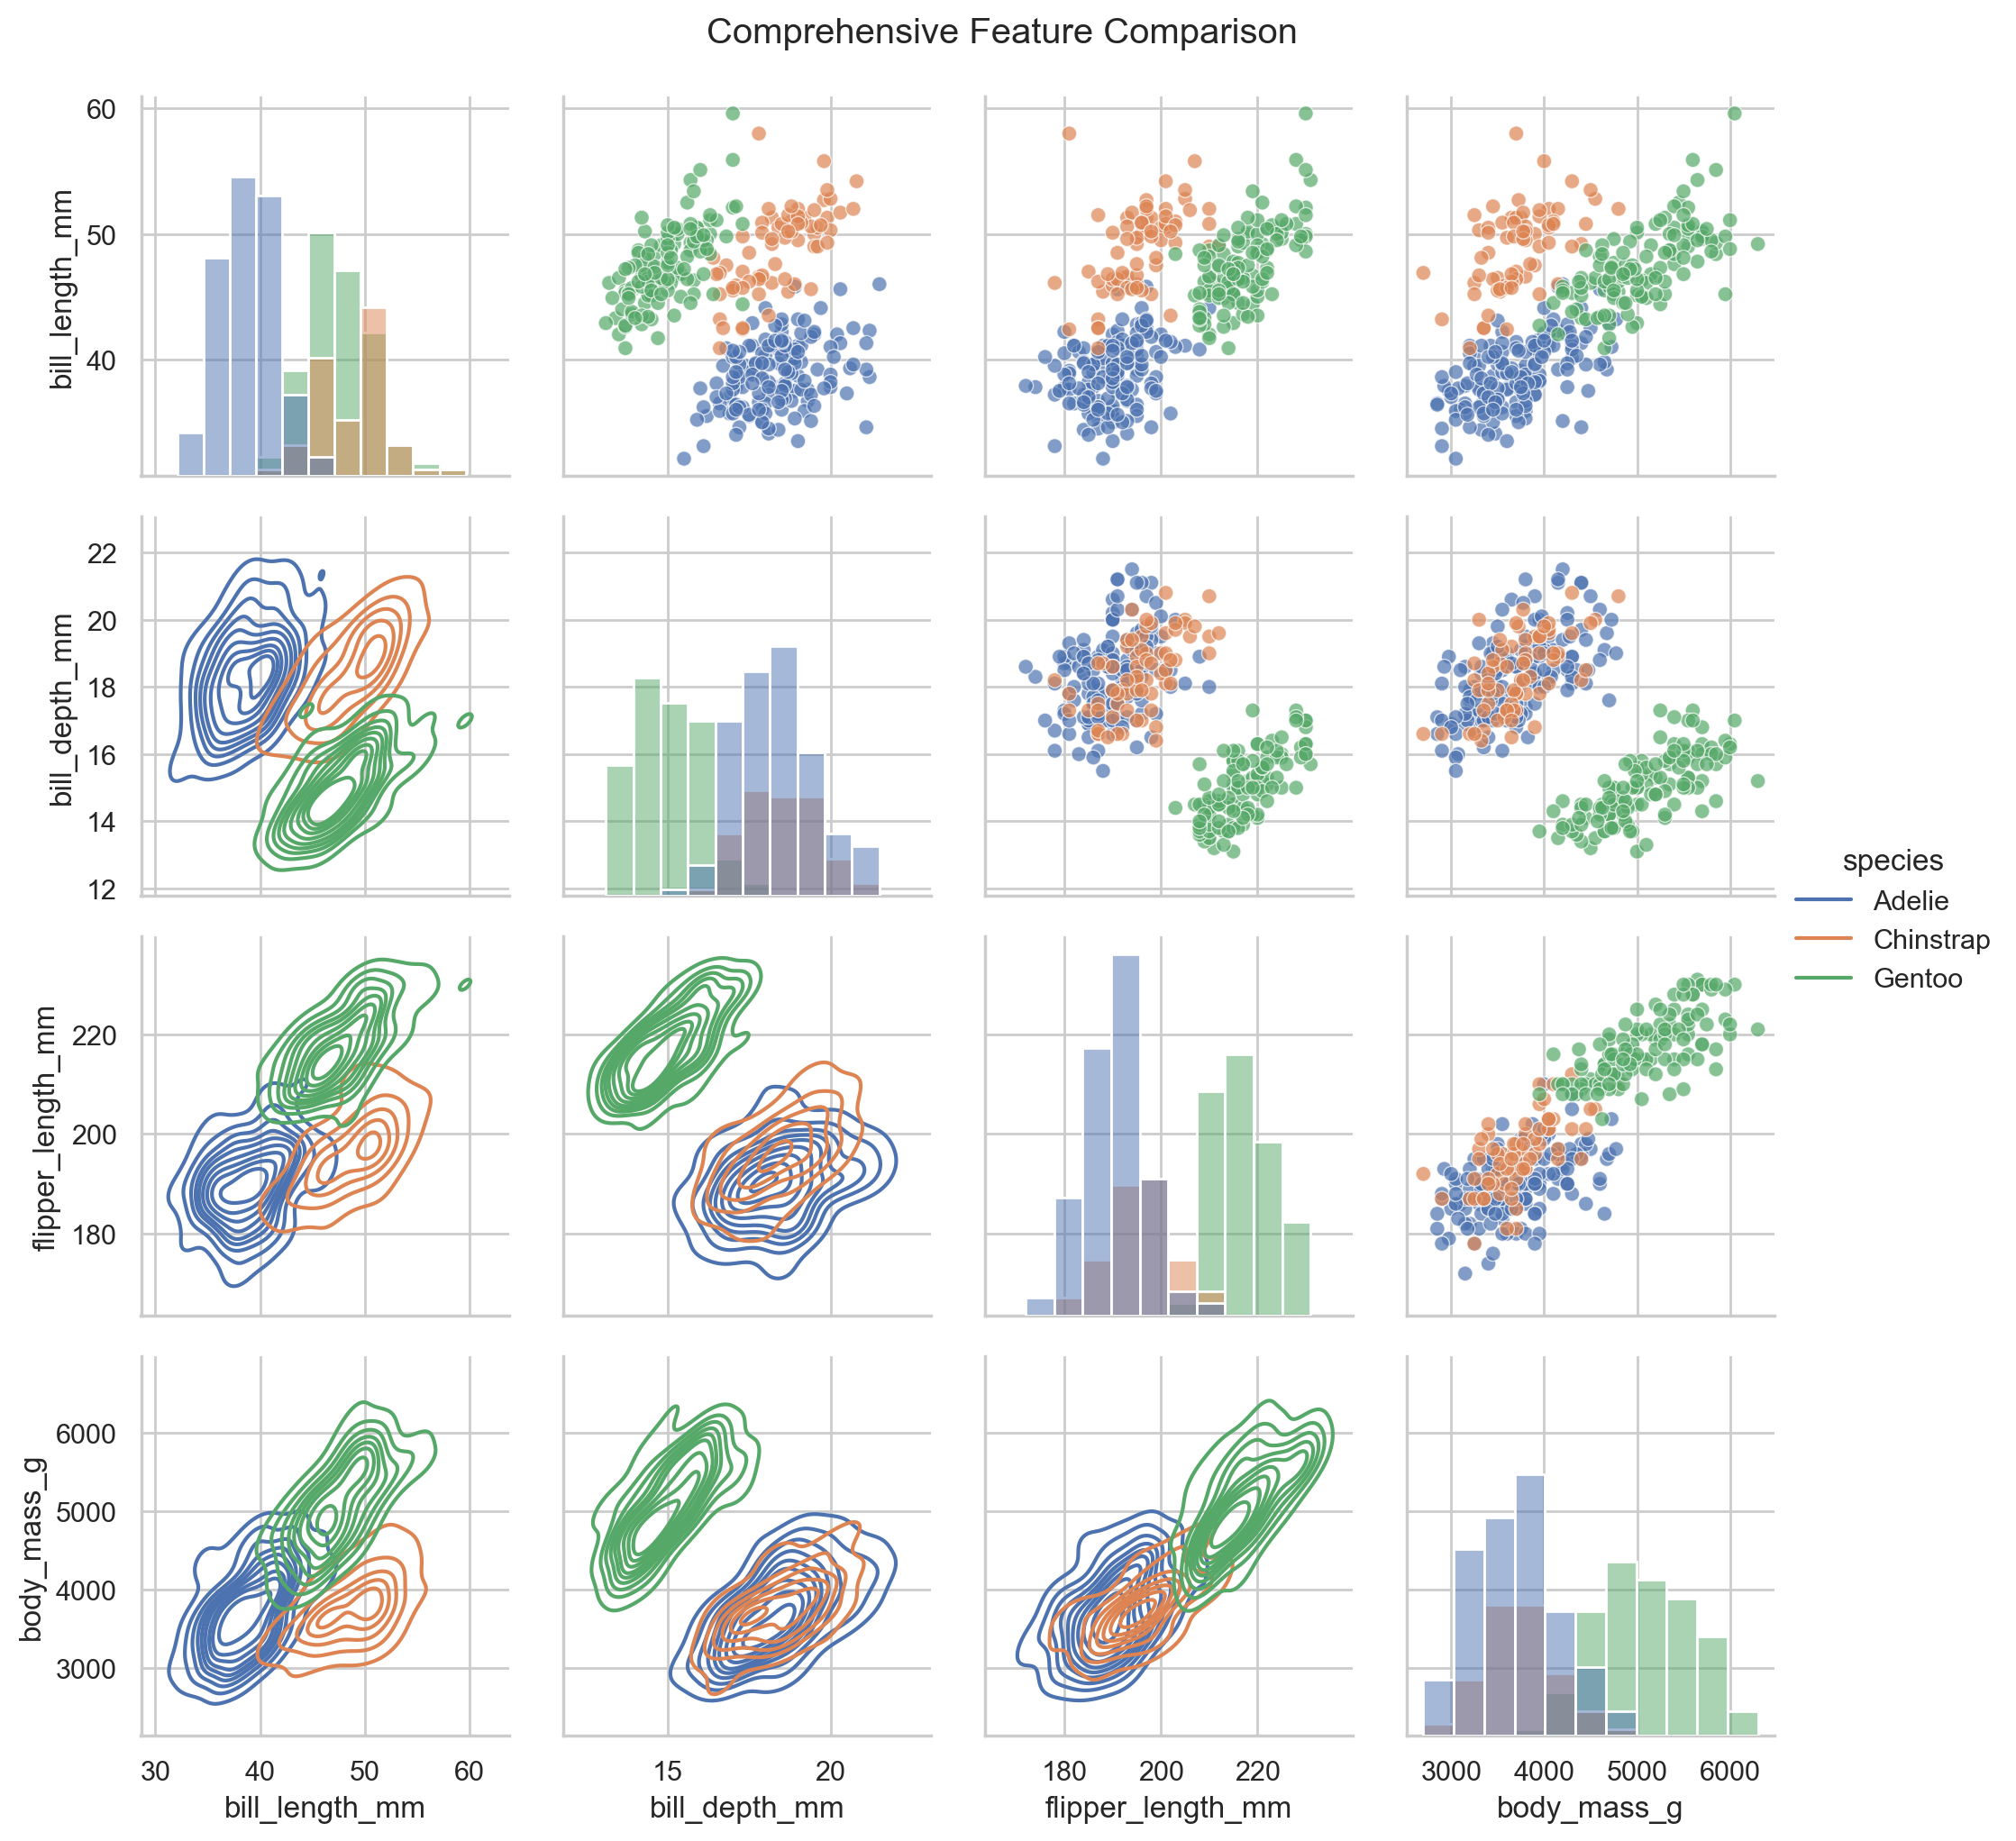

In [10]:
# FacetGrid for exploring relationships
g = sns.FacetGrid(penguins, col='island', row='sex', 
                  hue='species', height=3, aspect=1.2)
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm', alpha=0.7)
g.add_legend()
g.fig.suptitle('Bill Dimensions by Island and Sex', y=1.02)
plt.show()

# PairGrid for comprehensive comparisons
g = sns.PairGrid(penguins, hue='species', 
                 vars=['bill_length_mm', 'bill_depth_mm', 
                       'flipper_length_mm', 'body_mass_g'])
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.kdeplot)
g.add_legend()
g.fig.suptitle('Comprehensive Feature Comparison', y=1.02)
plt.show()

## Part 4: Time Series Visualization

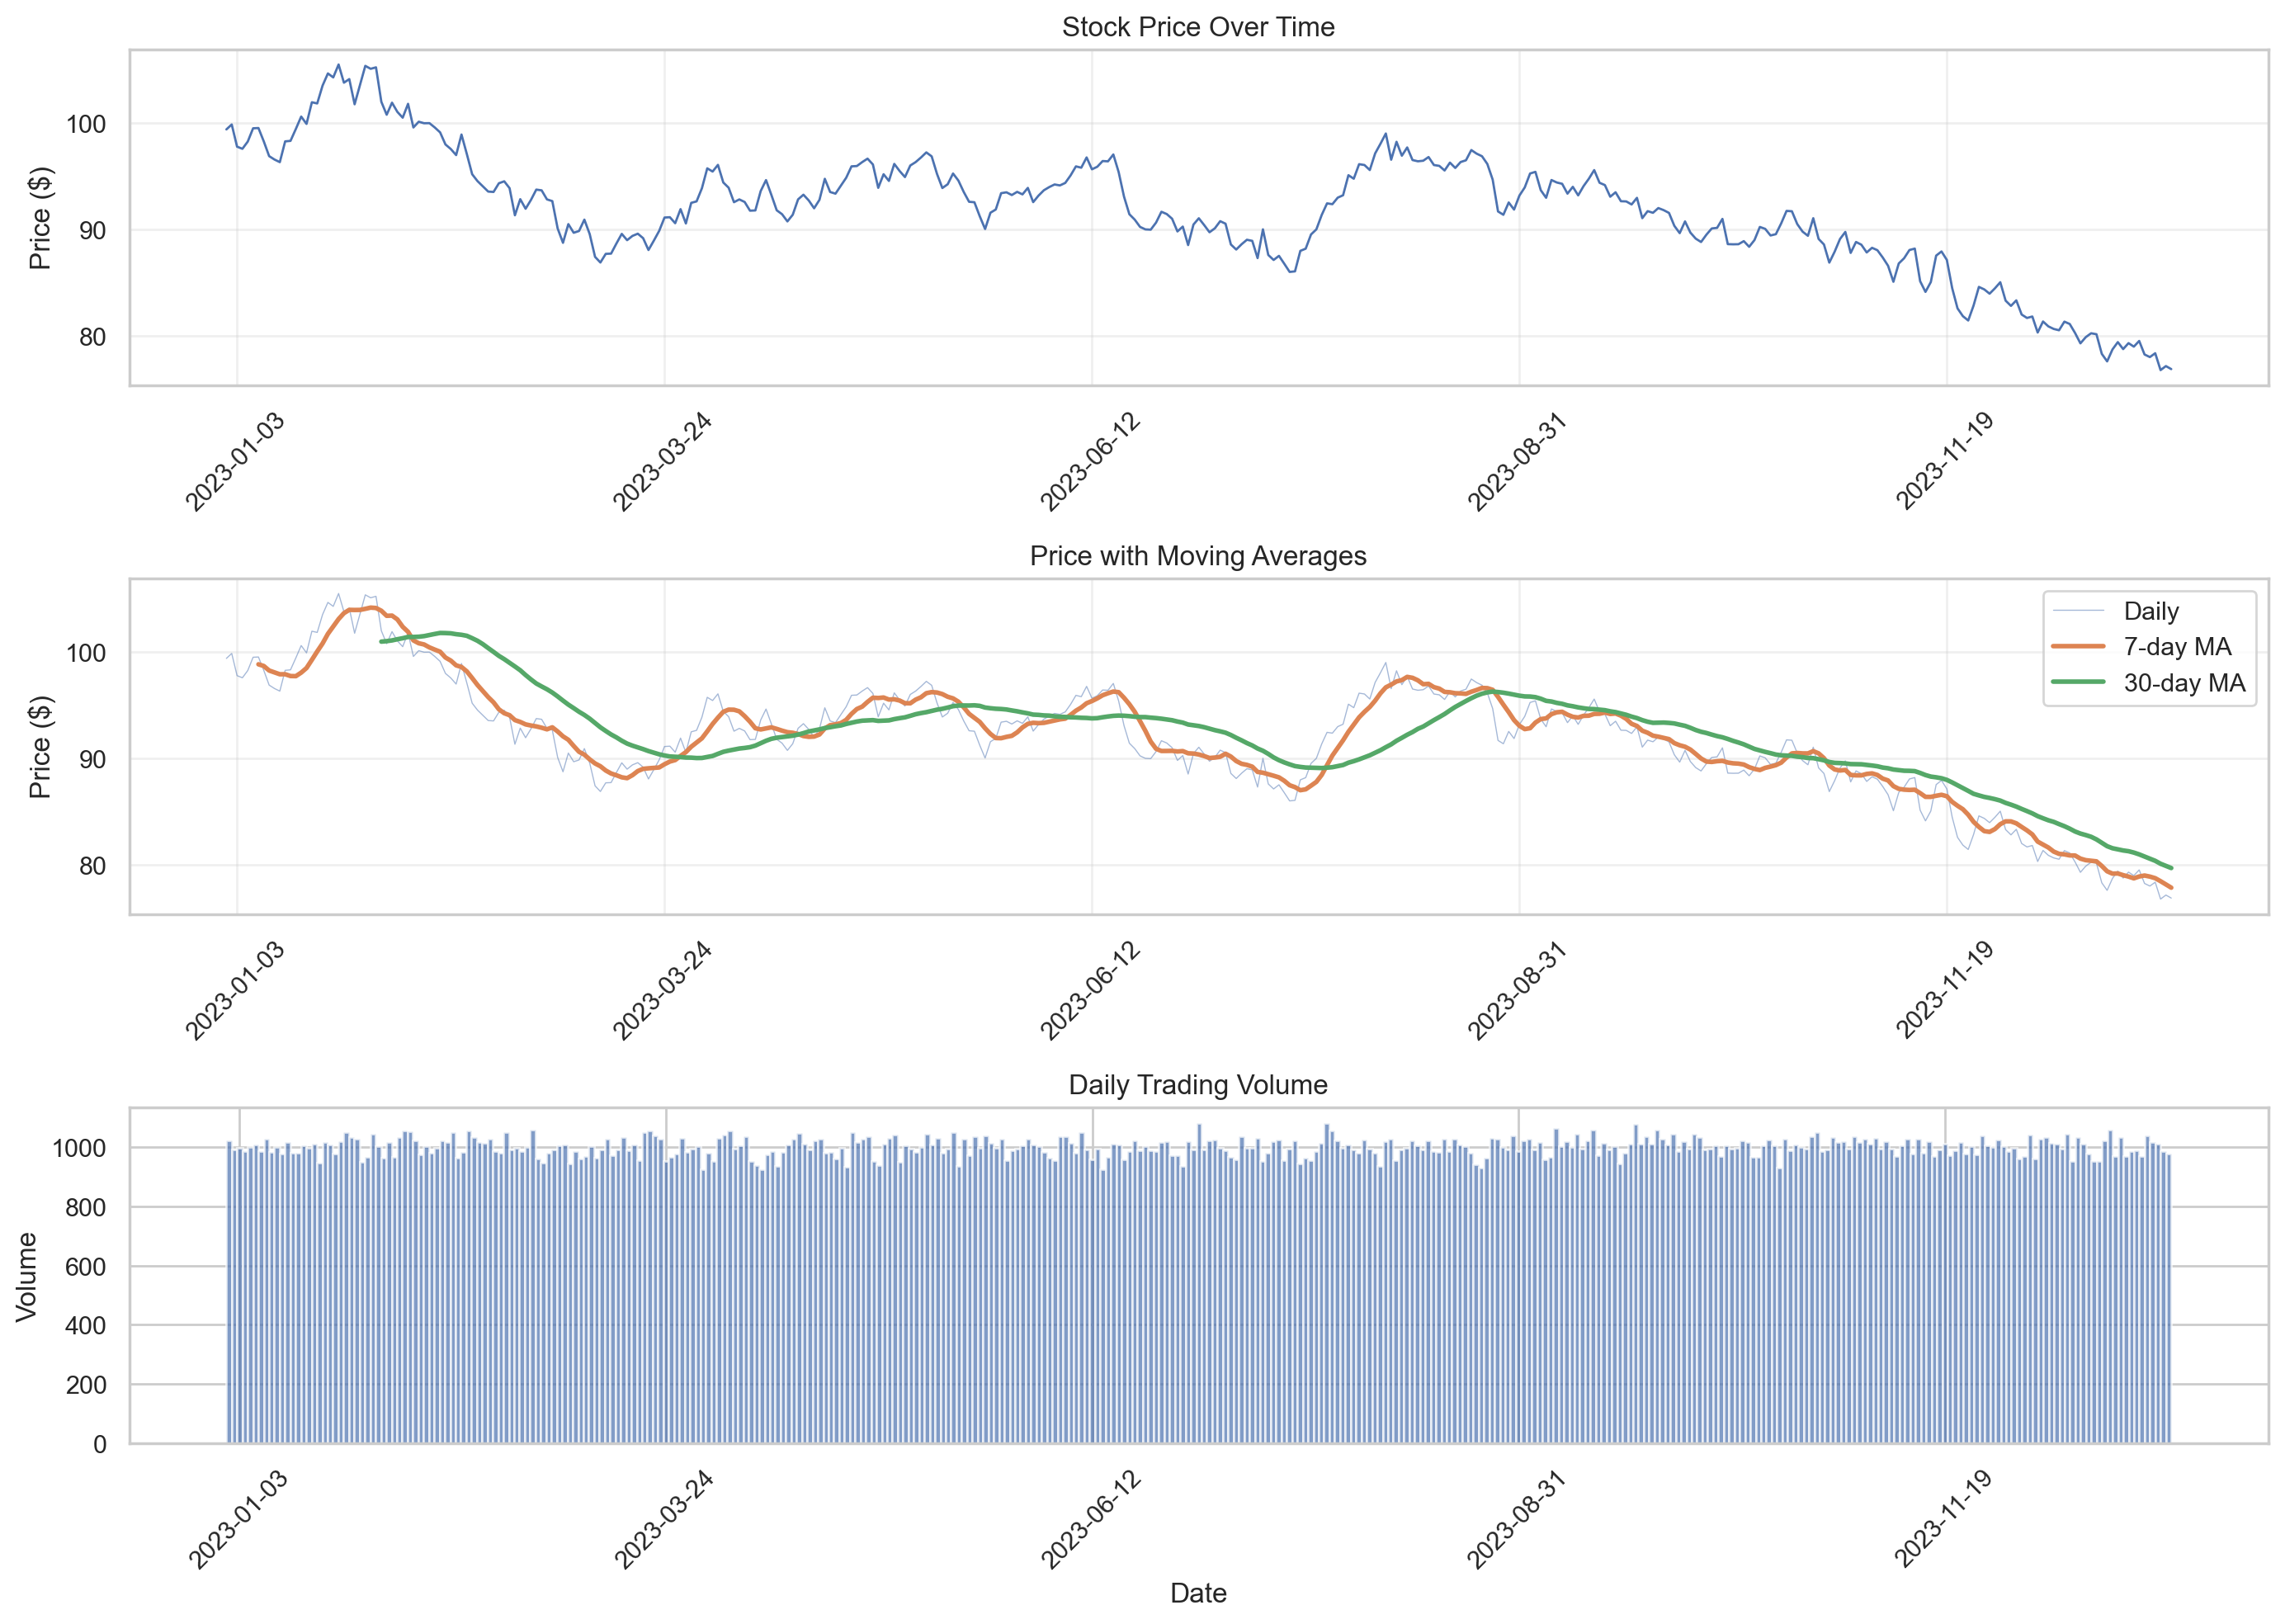

In [11]:
# Time series plots
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# 1. Basic time series
axes[0].plot(ts_data['date'], ts_data['value'], linewidth=1)
axes[0].set_title('Stock Price Over Time')
axes[0].set_ylabel('Price ($)')
axes[0].grid(True, alpha=0.3)

# 2. Moving averages
ts_data['MA7'] = ts_data['value'].rolling(window=7).mean()
ts_data['MA30'] = ts_data['value'].rolling(window=30).mean()

axes[1].plot(ts_data['date'], ts_data['value'], 
             label='Daily', alpha=0.5, linewidth=0.5)
axes[1].plot(ts_data['date'], ts_data['MA7'], 
             label='7-day MA', linewidth=2)
axes[1].plot(ts_data['date'], ts_data['MA30'], 
             label='30-day MA', linewidth=2)
axes[1].set_title('Price with Moving Averages')
axes[1].set_ylabel('Price ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Volume bars
axes[2].bar(ts_data['date'], ts_data['volume'], width=1, alpha=0.7)
axes[2].set_title('Daily Trading Volume')
axes[2].set_ylabel('Volume')
axes[2].set_xlabel('Date')

# Format x-axis
for ax in axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Part 5: Interactive Visualizations with Plotly

In [12]:
# Interactive scatter plot
fig = px.scatter(penguins, 
                 x='bill_length_mm', 
                 y='bill_depth_mm',
                 color='species',
                 size='body_mass_g',
                 hover_data=['island', 'sex'],
                 title='Interactive Penguin Data Explorer',
                 labels={'bill_length_mm': 'Bill Length (mm)',
                        'bill_depth_mm': 'Bill Depth (mm)'})

fig.update_layout(height=600)
fig.show()

NameError: name 'px' is not defined

In [ ]:
# 3D scatter plot
fig = px.scatter_3d(penguins,
                    x='bill_length_mm',
                    y='bill_depth_mm',
                    z='flipper_length_mm',
                    color='species',
                    size='body_mass_g',
                    hover_name='species',
                    title='3D Penguin Measurements')

fig.update_layout(height=700)
fig.show()

In [ ]:
# Interactive time series
fig = go.Figure()

fig.add_trace(go.Scatter(x=ts_data['date'], y=ts_data['value'],
                         mode='lines',
                         name='Price',
                         line=dict(width=1)))

fig.add_trace(go.Scatter(x=ts_data['date'], y=ts_data['MA7'],
                         mode='lines',
                         name='7-day MA',
                         line=dict(width=2)))

fig.add_trace(go.Scatter(x=ts_data['date'], y=ts_data['MA30'],
                         mode='lines',
                         name='30-day MA',
                         line=dict(width=2)))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title='Interactive Time Series with Range Slider',
                  height=600)
fig.show()

## Part 6: Advanced Customization

### Custom Color Palettes

In [ ]:
# Define custom colors
custom_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# Apply custom palette
plt.figure(figsize=(12, 6))

# Subplot 1: Default colors
plt.subplot(1, 2, 1)
sns.barplot(data=tips.groupby('day')['total_bill'].mean().reset_index(),
            x='day', y='total_bill')
plt.title('Default Colors')

# Subplot 2: Custom colors
plt.subplot(1, 2, 2)
sns.barplot(data=tips.groupby('day')['total_bill'].mean().reset_index(),
            x='day', y='total_bill',
            palette=custom_palette[:4])
plt.title('Custom Colors')

plt.tight_layout()
plt.show()

# Show available color palettes
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
palettes = ['deep', 'pastel', 'dark', 'colorblind', 'husl', 'Set2']

for ax, palette in zip(axes.flat, palettes):
    sns.barplot(data=tips.groupby('day')['total_bill'].mean().reset_index(),
                x='day', y='total_bill',
                palette=palette, ax=ax)
    ax.set_title(f'Palette: {palette}')

plt.tight_layout()
plt.show()

### Annotations and Text

In [ ]:
# Advanced annotations
fig, ax = plt.subplots(figsize=(12, 8))

# Create base plot
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax.plot(x, y1, 'b-', linewidth=2, label='sin(x)')
ax.plot(x, y2, 'r-', linewidth=2, label='cos(x)')

# Add various annotations
# 1. Simple text
ax.text(5, 0.5, 'Trigonometric Functions', 
        fontsize=14, ha='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Arrow annotation
ax.annotate('Maximum', xy=(np.pi/2, 1), xytext=(np.pi/2 + 1, 0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'),
            fontsize=12)

# 3. Highlight region
ax.axvspan(3, 5, alpha=0.2, color='yellow', label='Region of Interest')

# 4. Mathematical expression
ax.text(8, -0.5, r'$\int_{0}^{\pi} \sin(x)dx = 2$', 
        fontsize=14, color='green')

# 5. Add value labels
for i in range(0, 11, 2):
    ax.plot(i, np.sin(i), 'bo', markersize=8)
    ax.text(i, np.sin(i) + 0.1, f'{np.sin(i):.2f}', 
            ha='center', fontsize=10)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Advanced Annotations Example', fontsize=16, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.show()

## Part 7: Saving and Exporting Plots

In [ ]:
# Create a publication-quality figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species', style='sex', s=100, ax=ax)

# Customize for publication
ax.set_xlabel('Bill Length (mm)', fontsize=12)
ax.set_ylabel('Bill Depth (mm)', fontsize=12)
ax.set_title('Palmer Penguins Bill Morphology', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save in multiple formats
# High-resolution PNG
plt.savefig('penguin_plot.png', dpi=300, bbox_inches='tight')

# Vector format for publications
plt.savefig('penguin_plot.pdf', bbox_inches='tight')

# SVG for web
plt.savefig('penguin_plot.svg', bbox_inches='tight')

print("Plots saved as:")
print("- penguin_plot.png (300 DPI)")
print("- penguin_plot.pdf (vector)")
print("- penguin_plot.svg (web)")

plt.show()

## Best Practices and Tips

### 1. Choose the Right Plot Type

| Data Type | Recommended Plots |
|-----------|------------------|
| **Distributions** | Histogram, KDE, Box plot, Violin plot |
| **Relationships** | Scatter plot, Line plot, Regression plot |
| **Comparisons** | Bar plot, Grouped bar, Heatmap |
| **Proportions** | Pie chart, Stacked bar, Treemap |
| **Time Series** | Line plot, Area plot, Candlestick |
| **Multivariate** | Pair plot, Parallel coordinates, PCA plot |

### 2. Color Guidelines

- Use colorblind-friendly palettes
- Limit to 5-7 distinct colors
- Use color meaningfully (not just decoratively)
- Consider grayscale printing

### 3. Text and Labels

- Always label axes with units
- Use descriptive titles
- Keep text readable (min 8pt font)
- Avoid overlapping labels

### 4. Performance Tips

- For large datasets (>10k points), consider:
  - Sampling or aggregation
  - Rasterization for scatter plots
  - Interactive tools like Plotly or Bokeh
  - Datashader for millions of points

## Exercises

Try these exercises to practice your visualization skills:

1. **Basic**: Create a figure with 4 subplots showing different aspects of the tips dataset
2. **Intermediate**: Build an interactive dashboard with Plotly showing penguin data
3. **Advanced**: Create a custom visualization function that automatically chooses the best plot type based on data types

### Exercise 1 Solution Starter

In [ ]:
# Exercise 1: Your code here
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Add your plots here
# Hint: Try different plot types for different relationships in the tips data

plt.tight_layout()
plt.show()

## Resources and Further Learning

  
  
### Documentation
- [Matplotlib Documentation](https://matplotlib.org/)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Plotly Python](https://plotly.com/python/)

### Galleries and Examples
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)

### Books and Courses
- "Fundamentals of Data Visualization" by Claus O. Wilke
- "Storytelling with Data" by Cole Nussbaumer Knaflic

### Color Resources
- [ColorBrewer](https://colorbrewer2.org/)
- [Coolors](https://coolors.co/)
- [Adobe Color](https://color.adobe.com/)

## Summary

You've learned:
- **Matplotlib**: Low-level control for custom plots
- **Seaborn**: Statistical visualizations with less code
- **Plotly**: Interactive and 3D visualizations
- **Best Practices**: How to create effective, beautiful visualizations

Remember: Good visualization is about **clarity**, not complexity. Start simple, then add complexity only when it adds value!